# 개요
그룹화와 집계(함수), 필터링과 변환에 대해 자세히 다루겠습니다.  
- pandas 에서는 주로 groupby 함수를 이용할 수 있습니다.
- groupby 메서드의 결과는 groupby 객체가 됩니다. 
- groupby 객체를 aggregation function을 사용해 분석을 진행한 후 다시 합치는 것을 보았습니다.  
- 데이터 분석에서 이런 접근을 Split-Apply-Combine(분할-적용-병합)으로 부릅니다.  

데이터를 나눠서 본다고 생각했을때 groupby는 피할 수 없습니다.  
데이터를 세부적으로 나눠서 추가적으로 분석하든 변환하든 데이터를 뭔가 추가적인 정보를 뽑아낸다든지 한다음에 다시 합쳐서 부분과 전체를 왔다갔다하는 접근한다. 이것을 Split-Apply-Combine이라고 한다.

# 1. 집계 정의  
여기서는 flights 데이터셋을 이용해 간단한 집계함수들을 적용해 보겠습니다.  
평균, 분산 등 구하는 모든 것을 집계함수라고 하죠

In [1]:
import pandas as pd
import numpy as np

항공사, 출발지와 도착지, 출발할 시간, 출발지연시간, 얼마나 오래동안 비행이 이뤄지는지, 거리, 도착예정시간, 도착딜레이, 우회했는지,취소가 됐는지 등을 담고있다.

In [2]:
flights=pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


object 열이 그룹화하기가 가장 만만합니다! -> 카테고리일 가능성이 높으니까요. 한번 확인해 보겠습니다.

In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


object만 보기위해서 select_dtype 형태를 취해줍니다

In [4]:
flights.select_dtypes('object')

,AIRLINE,ORG_AIR,DEST_AIR
0,WN,LAX,SLC
1,UA,DEN,IAD
2,MQ,DFW,VPS
3,AA,DFW,DCA
4,WN,LAX,MCI
...,...,...,...
58487,AA,SFO,DFW
58488,F9,LAS,SFO
58489,OO,SFO,SBA
58490,WN,MSP,ATL


airline(항공사)를 이용하여 지연시간의 평균을 구해보도록 하겠습니다.

In [5]:
(
    flights
    .groupby('AIRLINE')
    .agg({'ARR_DELAY':'mean'})#mean 이라는 집계함수를 적용할 수 있습니다. 지연시간의 평균을 구할 수 있습니다.
    #함수안에 인자, 특정컬럼과 매칭해서 딕셔너리 형태로 가능하다.
)

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


#agg의 용법은 함수명만 전달할 때엔 전체 컬럼에 대해, 딕셔너리를 전달할 때엔 해당 컬럼에 대해 aggragation

In [6]:
(
flights
.groupby('AIRLINE')
.agg('mean')#mean을 해도 되지만 특정컬럼을 하지않았기때문에 각 그룹별로 적용가능하다. 
    #얼마나 항로를 변경했는지, 우회했는지 비율을 확인할 수 도있다.
)

,MONTH,DAY,WEEKDAY,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
AIRLINE,,,,,,,,,,,
AA,6.661461,15.570562,3.986966,1340.140449,11.274057,144.259404,1114.347865,1546.960899,5.542661,0.002921,0.017303
AS,6.197917,15.247396,3.941406,1418.269531,1.808594,147.845052,1065.884115,1548.292969,-0.833333,0.000000,0.000000
B6,6.368324,15.788214,4.040516,1512.924494,14.287823,209.412963,1771.882136,1432.889503,8.692593,0.003683,0.001842
DL,6.277332,15.721158,3.913310,1426.563154,7.242450,115.334187,866.448448,1578.735402,0.339691,0.002264,0.003585
EV,6.003926,15.866166,3.927450,1415.510413,9.092625,68.964016,460.237453,1571.798054,7.034580,0.002561,0.024923
F9,6.401670,15.914958,4.007593,1407.121488,14.310398,127.592337,969.593014,1510.177677,13.630651,0.001519,0.007593
HA,5.508929,15.526786,3.750000,959.419643,2.571429,338.288288,2615.178571,1280.714286,4.972973,0.008929,0.000000
MQ,5.970614,15.598963,3.902622,1432.251801,11.094323,61.318346,404.229041,1587.835494,6.860591,0.001441,0.043791
NK,6.602243,15.680739,4.006596,1336.634565,19.514401,135.736878,1047.428100,1398.226913,18.436070,0.003298,0.016491


In [7]:
(flights
.groupby('AIRLINE')
[['ARR_DELAY']]
.agg('mean'))

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


In [8]:
(flights
.groupby('AIRLINE')
['ARR_DELAY']
.mean()
)

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

집계함수가 아니면 에러가 생깁니다.

In [9]:
(flights
.groupby('AIRLINE')
['ARR_DELAY']
.agg(np.sqrt)
)

C:\Users\rkdwn\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Must produce aggregated value

# 2. 여러 일을 사용한 집계

groupby에서 여러 컬럼을 선택한다면, 해당 컬럼의 조합 수 만큼 세부 그룹이 생기고, 그에 따라 집계함수를 수행하게 됩니다. 아래의경우들을 보겠습니다.

항공사 / 요일별 취소 수

In [10]:
(
    flights
    .groupby(['AIRLINE','WEEKDAY'])
    ['CANCELLED']
    .agg('sum')
)

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
                    ..
WN       3          18
         4          10
         5           7
         6          10
         7           7
Name: CANCELLED, Length: 98, dtype: int64

요일별 항공사 취소 또는 우회 항공편 수

In [11]:
(
    flights
    .groupby(['AIRLINE','WEEKDAY'])
    [['CANCELLED','DIVERTED']]
    .agg(['sum','mean'])
)#캔슬에서의 sum과 mean을 DIVERTED에서의 sum과 mean을 계산해준다.
# 3퍼센스가 취소를하고, 4퍼센트가 우회를 한다.

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
...                   ...       ...      ...       ...
WN      3              18  0.014118        2  0.001569
        4              10  0.007911        4  0.003165
        5               7  0.005828        0  0.000000
        6              10  0.010132        3  0.003040
        7               7  0.006066        3  0.002600

[98 rows x 4 columns]

출발지 / 도착지에 대해 총 항공편, 취소 항공편 수와 비율, 비행 시간의 평균과 분산 

In [12]:
#출발지 도착지에서 왼쪽부분을 처리, 컬럼은 취소항공편 그리고 비행시간,
(
    flights
    .groupby(['ORG_AIR','DEST_AIR'])
    .agg({'CANCELLED':['sum','mean','size'],
         'AIR_TIME':['mean','var']})
)#Air time의 평균과 분산은 어떻게 되는지

CANCELLED                   AIR_TIME            
                       sum      mean size        mean         var
ORG_AIR DEST_AIR                                                 
ATL     ABE              0  0.000000   31   96.387097   45.778495
        ABQ              0  0.000000   16  170.500000   87.866667
        ABY              0  0.000000   19   28.578947    6.590643
        ACY              0  0.000000    6   91.333333   11.466667
        AEX              0  0.000000   40   78.725000   47.332692
...                    ...       ...  ...         ...         ...
SFO     SNA              4  0.032787  122   64.059322   11.338331
        STL              0  0.000000   20  198.900000  101.042105
        SUN              0  0.000000   10   78.000000   25.777778
        TUS              0  0.000000   20  100.200000   35.221053
        XNA              0  0.000000    2  173.500000    0.500000

[1130 rows x 5 columns]

NameAgg를 사용하면, 컬럼 이름을 지정하여 집계함수를 사용할 수 있습니다.  
또 이 메서드는 column의 레벨을 만들지 않는다는 특징이 있습니다.  

In [13]:
(
    flights
    .groupby(['ORG_AIR','DEST_AIR'])
    .agg(sum_cancelled=pd.NamedAgg(column='CANCELLED',aggfunc='sum'),
        mean_calcelled=pd.NamedAgg(column='CANCELLED',aggfunc='mean'),
        size_cancelled=pd.NamedAgg(column='CANCELLED',aggfunc='size'),
        mean_air_time=pd.NamedAgg(column='AIR_TIME',aggfunc='mean'),
        var_air_time=pd.NamedAgg(column='AIR_TIME',aggfunc='var')
        )
)

sum_cancelled  mean_calcelled  size_cancelled  \
ORG_AIR DEST_AIR                                                  
ATL     ABE                   0        0.000000              31   
        ABQ                   0        0.000000              16   
        ABY                   0        0.000000              19   
        ACY                   0        0.000000               6   
        AEX                   0        0.000000              40   
...                         ...             ...             ...   
SFO     SNA                   4        0.032787             122   
        STL                   0        0.000000              20   
        SUN                   0        0.000000              10   
        TUS                   0        0.000000              20   
        XNA                   0        0.000000               2   

                  mean_air_time  var_air_time  
ORG_AIR DEST_AIR                               
ATL     ABE           96.387097     45.778495  
        ABQ          170.500000     87.866667  
        ABY           28.578947      6.590643  
        ACY           91.333333     11.466667  
        AEX           78.725000     47.332692  
...                         ...           ...  
SFO     SNA           64.059322     11.338331  
        STL          198.900000    101.042105  
        SUN           78.000000     25.777778  
        TUS          100.200000     35.221053  
        XNA          173.500000      0.500000  

[1130 rows x 5 columns]

만약 기존의 코드에서 컬럼 인덱스의 레벨을 제거하고 싶다면, to_flat_index를 사용합니다.

In [14]:
res = (
 flights
 .groupby(['ORG_AIR', 'DEST_AIR'])
 .agg({'CANCELLED':['sum', 'mean', 'size'],
 'AIR_TIME':['mean', 'var']})
)
res.columns = ['_'.join(x) for x in res.columns.to_flat_index()]#이런식으로 활용합니다.
#원래 있었던 컬럼들을 확인해보면  re.columns를 보면 MultiIndex가 되어있고, 그래서 어떻게 하냐.? 튜플을 합쳐서 내보내고 싶다. 
#Cancell
res


CANCELLED_sum  CANCELLED_mean  CANCELLED_size  \
ORG_AIR DEST_AIR                                                  
ATL     ABE                   0        0.000000              31   
        ABQ                   0        0.000000              16   
        ABY                   0        0.000000              19   
        ACY                   0        0.000000               6   
        AEX                   0        0.000000              40   
...                         ...             ...             ...   
SFO     SNA                   4        0.032787             122   
        STL                   0        0.000000              20   
        SUN                   0        0.000000              10   
        TUS                   0        0.000000              20   
        XNA                   0        0.000000               2   

                  AIR_TIME_mean  AIR_TIME_var  
ORG_AIR DEST_AIR                               
ATL     ABE           96.387097     45.778495  
        ABQ          170.500000     87.866667  
        ABY           28.578947      6.590643  
        ACY           91.333333     11.466667  
        AEX           78.725000     47.332692  
...                         ...           ...  
SFO     SNA           64.059322     11.338331  
        STL          198.900000    101.042105  
        SUN           78.000000     25.777778  
        TUS          100.200000     35.221053  
        XNA          173.500000      0.500000  

[1130 rows x 5 columns]

In [15]:
'_'.join(res.columns.to_flat_index()[0])

'C_A_N_C_E_L_L_E_D___s_u_m'

In [16]:
res.columns

Index(['CANCELLED_sum', 'CANCELLED_mean', 'CANCELLED_size', 'AIR_TIME_mean',
       'AIR_TIME_var'],
      dtype='object')

In [17]:
'_'.join(res.columns.to_flat_index()[0]

SyntaxError: unexpected EOF while parsing (<ipython-input-17-60e3357a5126>, line 1)

In [18]:
res

CANCELLED_sum  CANCELLED_mean  CANCELLED_size  \
ORG_AIR DEST_AIR                                                  
ATL     ABE                   0        0.000000              31   
        ABQ                   0        0.000000              16   
        ABY                   0        0.000000              19   
        ACY                   0        0.000000               6   
        AEX                   0        0.000000              40   
...                         ...             ...             ...   
SFO     SNA                   4        0.032787             122   
        STL                   0        0.000000              20   
        SUN                   0        0.000000              10   
        TUS                   0        0.000000              20   
        XNA                   0        0.000000               2   

                  AIR_TIME_mean  AIR_TIME_var  
ORG_AIR DEST_AIR                               
ATL     ABE           96.387097     45.778495  
        ABQ          170.500000     87.866667  
        ABY           28.578947      6.590643  
        ACY           91.333333     11.466667  
        AEX           78.725000     47.332692  
...                         ...           ...  
SFO     SNA           64.059322     11.338331  
        STL          198.900000    101.042105  
        SUN           78.000000     25.777778  
        TUS          100.200000     35.221053  
        XNA          173.500000      0.500000  

[1130 rows x 5 columns]

In [20]:
#Na값을 살려내기 때문에, ORG_AIR, 위에ㅓ서 보게되면 1130개의 row를, 이렇게 하고 보니까 
res = (
 flights
 .groupby(['ORG_AIR', 'DEST_AIR'])
 .agg({'CANCELLED':['sum', 'mean', 'size'],
 'AIR_TIME':['mean', 'var']})
)
res

CANCELLED                   AIR_TIME            
                       sum      mean size        mean         var
ORG_AIR DEST_AIR                                                 
ATL     ABE              0  0.000000   31   96.387097   45.778495
        ABQ              0  0.000000   16  170.500000   87.866667
        ABY              0  0.000000   19   28.578947    6.590643
        ACY              0  0.000000    6   91.333333   11.466667
        AEX              0  0.000000   40   78.725000   47.332692
...                    ...       ...  ...         ...         ...
SFO     SNA              4  0.032787  122   64.059322   11.338331
        STL              0  0.000000   20  198.900000  101.042105
        SUN              0  0.000000   10   78.000000   25.777778
        TUS              0  0.000000   20  100.200000   35.221053
        XNA              0  0.000000    2  173.500000    0.500000

[1130 rows x 5 columns]

observed=True 시 존재하는 조합에 대해서만 groupby 객체를 만든다.  
카테고리를 바꿀때 효율이 좋다. 그때 observed True를 해서 필요없는 그룹을 만드는 것이 좋다.  
### 카테고리 폭발을 조심하자

In [21]:
res = (
 flights
 .groupby(['ORG_AIR', 'DEST_AIR'],observed=True)
 .agg({'CANCELLED':['sum', 'mean', 'size'],
 'AIR_TIME':['mean', 'var']})
)
res

CANCELLED                   AIR_TIME            
                       sum      mean size        mean         var
ORG_AIR DEST_AIR                                                 
ATL     ABE              0  0.000000   31   96.387097   45.778495
        ABQ              0  0.000000   16  170.500000   87.866667
        ABY              0  0.000000   19   28.578947    6.590643
        ACY              0  0.000000    6   91.333333   11.466667
        AEX              0  0.000000   40   78.725000   47.332692
...                    ...       ...  ...         ...         ...
SFO     SNA              4  0.032787  122   64.059322   11.338331
        STL              0  0.000000   20  198.900000  101.042105
        SUN              0  0.000000   10   78.000000   25.777778
        TUS              0  0.000000   20  100.200000   35.221053
        XNA              0  0.000000    2  173.500000    0.500000

[1130 rows x 5 columns]

# 3. 다중 인덱스 제거하기  
그룹화를 하다 보면 다중 인덱스(여러 레벨을 갖는) 가 생성되기 마련입니다.  
수월한 데이터 분석을 위해서 해당 인덱스들을 원래대로(DF형태로) 바꾸는 작업이 필요합니다. 

In [22]:
airline_info=(
flights
.groupby(['AIRLINE','WEEKDAY'])
.agg({'DIST':['sum','mean'],
     'ARR_DELAY':['min','max']})
.astype(int))

In [23]:
airline_info

DIST       ARR_DELAY     
                     sum  mean       min  max
AIRLINE WEEKDAY                              
AA      1        1455386  1139       -60  551
        2        1358256  1107       -52  725
        3        1496665  1117       -45  473
        4        1452394  1089       -46  349
        5        1427749  1122       -41  732
...                  ...   ...       ...  ...
WN      3         997213   782       -38  262
        4        1024854   810       -52  284
        5         981036   816       -44  244
        6         823946   834       -41  290
        7         945679   819       -45  261

[98 rows x 4 columns]

최대와 최소 연착시간을 찾아보았습니다. ARR_DELAY의 최소값과 최대값을 구해봤습닌다. 이게 integer다라는것을 보았습니다.  
행과 열 모두 다중 인덱스인 것을 알 수 있습니다.  
우선 열에 대해서만 풀어보겠습니다. 위에서 배운 to_flat_index를 사용합니다.  
그 전에 인덱스의 구조를 분해해보겠습니다.  

In [24]:
airline_info.columns.get_level_values(0)

Index(['DIST', 'DIST', 'ARR_DELAY', 'ARR_DELAY'], dtype='object')

In [25]:
airline_info.columns.get_level_values(1)

Index(['sum', 'mean', 'min', 'max'], dtype='object')

In [26]:
airline_info.columns.to_flat_index()

Index([('DIST', 'sum'), ('DIST', 'mean'), ('ARR_DELAY', 'min'),
       ('ARR_DELAY', 'max')],
      dtype='object')

리스트를 압출할 때 사용하는 기법이다. x가 Y안에있는데 Y에서 하나씩 뽑을껀데 '_'.join(x)로 활용하겠다 스트링메서드를 의미하며 스트링메서드중에 join을 사용하겠다. 이 메서드는 앞에 있는 것을 가져다가 뒤에있는것을 붙일때 사이의 구분자로 사용하게 된다. 따라서 Y에 DIST와 sum이있는데, 두개의 다른 요소를 연결하기 위해서 _ 를 사용한다. 

In [27]:
airline_info.columns=['_'.join(x) for x in airline_info.columns.to_flat_index()]

In [28]:
airline_info# 컬럼이름으로 깔끔하게 정리할 수 있다. 

DIST_sum  DIST_mean  ARR_DELAY_min  ARR_DELAY_max
AIRLINE WEEKDAY                                                   
AA      1         1455386       1139            -60            551
        2         1358256       1107            -52            725
        3         1496665       1117            -45            473
        4         1452394       1089            -46            349
        5         1427749       1122            -41            732
...                   ...        ...            ...            ...
WN      3          997213        782            -38            262
        4         1024854        810            -52            284
        5          981036        816            -44            244
        6          823946        834            -41            290
        7          945679        819            -45            261

[98 rows x 4 columns]

In [29]:
airline_info.reset_index()

,AIRLINE,WEEKDAY,DIST_sum,DIST_mean,ARR_DELAY_min,ARR_DELAY_max
0,AA,1,1455386,1139,-60,551
1,AA,2,1358256,1107,-52,725
2,AA,3,1496665,1117,-45,473
3,AA,4,1452394,1089,-46,349
4,AA,5,1427749,1122,-41,732
...,...,...,...,...,...,...
93,WN,3,997213,782,-38,262
94,WN,4,1024854,810,-52,284
95,WN,5,981036,816,-44,244
96,WN,6,823946,834,-41,290


사실상 첫번째 레벨들을 채워넣은다음에 그 부분에 인덱스를 해제해준다. 원래 데이터 프레임만들때 행번호 인덱스를 했는데 airline info프레임에서는 그런 형태를 찾을 수 없다. 

열쪽에 있는 레벨을 없애기 위해서는? 전단계에서 봤던것처럼 NamedAgg를 사용해도 된다. x출 인덱스에서 레벨을 제거하고 데이터프레임화 시키고 싶으면 reset_index를 사용한다. 따라서 하나의 코드로 나타내면 아래와 같다.

In [30]:
(
 flights
 .groupby(['AIRLINE', 'WEEKDAY'])
 .agg(dist_sum=pd.NamedAgg(column='DIST', aggfunc='sum'),
 dist_mean=pd.NamedAgg(column='DIST', aggfunc='mean'),
 arr_delay_min=pd.NamedAgg(column='ARR_DELAY', aggfunc='min'),
 arr_delay_max=pd.NamedAgg(column='ARR_DELAY', aggfunc='max'))
 .astype(int)
 .reset_index()
)


,AIRLINE,WEEKDAY,dist_sum,dist_mean,arr_delay_min,arr_delay_max
0,AA,1,1455386,1139,-60,551
1,AA,2,1358256,1107,-52,725
2,AA,3,1496665,1117,-45,473
3,AA,4,1452394,1089,-46,349
4,AA,5,1427749,1122,-41,732
...,...,...,...,...,...,...
93,WN,3,997213,782,-38,262
94,WN,4,1024854,810,-52,284
95,WN,5,981036,816,-44,244
96,WN,6,823946,834,-41,290


as_index를 False로 했을때에는 인덱스를 만들지 않습니다. True를 할때 기본값이니,  
airline도 두개다 인덱스로 잡혔는데, 이 순간 airline과 숫자들이 알아서 정렬이 돼있다. 

In [32]:
(
 flights
 .groupby(['AIRLINE'], as_index=False, sort=False) #sort 는 group을 정렬할지 정합니다.
 ['DIST']
 .agg('mean')
 .round(0)
)


,AIRLINE,DIST
0,WN,810.0
1,UA,1231.0
2,MQ,404.0
3,AA,1114.0
4,F9,970.0
5,EV,460.0
6,OO,511.0
7,NK,1047.0
8,US,1181.0
9,AS,1066.0


pandas는 여러 집계함수를 제공해주지만, 해당 함수들이 충분하지 않은 경우가 있습니다.  
이미 위에서 봤듯, agg엔 우리가 만든 함수를 넣을 수도 있습니다.  
college 데이터에서 각 주별 학부생 수의 평균과 표준편차를 보겠습니다.  

In [33]:
college = pd.read_csv('data/college.csv')
(
 college
 .groupby(['STABBR'])
 ['UGDS']
 .agg(['mean', 'std'])
 .round(0)
)


,mean,std
STABBR,,
AK,2493.0,4052.0
AL,2790.0,4658.0
AR,1644.0,3143.0
AS,1276.0,NaN
AZ,4130.0,14894.0
CA,3518.0,6709.0
CO,2325.0,4670.0
CT,1874.0,2871.0
DC,2645.0,3225.0


그렇다면 각 주별로 최대 표준편차를 찾고 싶다면 어떻게 할까요?  
판다스에서 기본적으로 제공하는 집계함수로는 어렵고 내가 원하는 함수를 만들어야합니다.  
이 메서드를 호출할 때, 별도의 인자를 주지 않는단 점도 눈여겨보세요.  
abs는 절대값을 뜨겠다는 뜻입니다. max는 최대값 음수든 양수든 0에서 가장 멀리떨어진 값을 보겠다가 이 함수의 목적입니다. 
이 max_deviation에서 선언할 때 s라고 되어있는데, 여기서는 아무것도 넘겨주지 않고 있습니다. 
가장 멀리떨어져있는 표준편차를 보여줍니다.

In [34]:
def max_deviation(s):
    std_score = (s - s.mean()) / s.std()
    return std_score.abs().max()
(
 college
 .groupby('STABBR')
 ['UGDS']
 .agg(max_deviation)
 .round(1) #반올림, 소수점 한자리까지만
)

STABBR
AK     2.6
AL     5.8
AR     6.3
AS     NaN
AZ     9.9
CA     6.1
CO     5.0
CT     5.6
DC     2.4
DE     3.5
FL     8.4
FM     NaN
GA     5.4
GU     1.0
HI     3.8
IA     6.5
ID     4.5
IL     7.3
IN     9.1
KS     4.9
KY     5.2
LA     6.5
MA     6.1
MD     5.3
ME     4.0
MH     NaN
MI     6.7
MN     7.8
MO     7.2
MP     NaN
MS     4.0
MT     3.9
NC     4.9
ND     3.5
NE     5.0
NH     5.3
NJ     7.1
NM     4.5
NV     4.7
NY     8.2
OH    10.3
OK     5.9
OR     5.3
PA    10.1
PR     6.0
PW     NaN
RI     2.9
SC     6.0
SD     4.2
TN     6.0
TX     7.7
UT     5.1
VA     7.0
VI     NaN
VT     3.8
WA     6.6
WI     5.8
WV     7.2
WY     2.8
Name: UGDS, dtype: float64

두개의 컬럼이 또 들어온다하면 각각의 컬럼에서 값을 적용한뒤에 얘기해줍니다. NaN같은 경우는 대학의 표준편차를 구할수없다. 대학이 한개라면 자기자신이 평균이기에 문제가 돼서 보이지 않는 것이죠.

In [36]:
# 만약 여러 개의 컬럼을 넣는다면, 각각 agg func 가 적용됩니다
(
 college
 .groupby('STABBR')
 [['UGDS', 'SATVRMID', 'SATMTMID']]
 .agg(max_deviation)
 .round(1)
)


,UGDS,SATVRMID,SATMTMID
STABBR,,,
AK,2.6,NaN,NaN
AL,5.8,1.6,1.8
AR,6.3,2.2,2.3
AS,NaN,NaN,NaN
AZ,9.9,1.9,1.4
CA,6.1,2.7,2.5
CO,5.0,2.1,2.3
CT,5.6,3.0,2.7
DC,2.4,1.7,1.6


In [37]:
(
    college
    .groupby(['STABBR','RELAFFIL'])
    [['UGDS','SATVRMID','SATMTMID']]
    .agg([max_deviation,'mean','std'])
    .round(1)
)

UGDS                      SATVRMID               \
                max_deviation    mean     std max_deviation   mean   std   
STABBR RELAFFIL                                                            
AK     0                  2.1  3508.9  4539.5           NaN    NaN   NaN   
       1                  1.1   123.3   132.9           NaN  555.0   NaN   
AL     0                  5.2  3248.8  5102.4           1.6  514.9  56.5   
       1                  2.4   979.7   870.8           1.5  498.0  53.0   
AR     0                  5.8  1793.7  3401.6           1.9  481.1  37.9   
...                       ...     ...     ...           ...    ...   ...   
WI     0                  5.3  2879.1  5031.5           1.3  558.8  47.5   
       1                  3.4  1716.2  1934.6           2.1  500.1  66.0   
WV     0                  6.9  1873.9  6271.7           1.6  466.7  27.9   
       1                  1.3   716.4   503.6           1.9  485.7  14.6   
WY     0                  2.8  2244.4  2744.7           NaN  535.0   NaN   

                     SATMTMID               
                max_deviation   mean   std  
STABBR RELAFFIL                             
AK     0                  NaN    NaN   NaN  
       1                  NaN  503.0   NaN  
AL     0                  1.7  515.8  56.7  
       1                  1.4  485.6  61.4  
AR     0                  2.0  503.6  39.0  
...                       ...    ...   ...  
WI     0                  1.3  591.2  85.7  
       1                  1.8  526.6  42.5  
WV     0                  1.8  480.0  27.7  
       1                  1.7  484.8  17.7  
WY     0                  NaN  540.0   NaN  

[112 rows x 9 columns]

In [38]:
# 커스텀 함수와 내장 함수를 같이 쓰는 것도 됩니다.
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATVRMID', 'SATMTMID']]
 .agg([max_deviation, 'mean', 'std'])
 .round(1)
)

UGDS                      SATVRMID               \
                max_deviation    mean     std max_deviation   mean   std   
STABBR RELAFFIL                                                            
AK     0                  2.1  3508.9  4539.5           NaN    NaN   NaN   
       1                  1.1   123.3   132.9           NaN  555.0   NaN   
AL     0                  5.2  3248.8  5102.4           1.6  514.9  56.5   
       1                  2.4   979.7   870.8           1.5  498.0  53.0   
AR     0                  5.8  1793.7  3401.6           1.9  481.1  37.9   
...                       ...     ...     ...           ...    ...   ...   
WI     0                  5.3  2879.1  5031.5           1.3  558.8  47.5   
       1                  3.4  1716.2  1934.6           2.1  500.1  66.0   
WV     0                  6.9  1873.9  6271.7           1.6  466.7  27.9   
       1                  1.3   716.4   503.6           1.9  485.7  14.6   
WY     0                  2.8  2244.4  2744.7           NaN  535.0   NaN   

                     SATMTMID               
                max_deviation   mean   std  
STABBR RELAFFIL                             
AK     0                  NaN    NaN   NaN  
       1                  NaN  503.0   NaN  
AL     0                  1.7  515.8  56.7  
       1                  1.4  485.6  61.4  
AR     0                  2.0  503.6  39.0  
...                       ...    ...   ...  
WI     0                  1.3  591.2  85.7  
       1                  1.8  526.6  42.5  
WV     0                  1.8  480.0  27.7  
       1                  1.7  484.8  17.7  
WY     0                  NaN  540.0   NaN  

[112 rows x 9 columns]

In [39]:
#기본적으로 함수 이름을 가져다가 컬럼 이름을 만들지만, 이를 내가 원하는대로 바꿀 수 있습니다.
max_deviation.__name__ = 'Progamming 3'
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 [['UGDS', 'SATVRMID', 'SATMTMID']]
 .agg([max_deviation, 'mean', 'std'])
 .round(1)
)


UGDS                     SATVRMID               \
                Progamming 3    mean     std Progamming 3   mean   std   
STABBR RELAFFIL                                                          
AK     0                 2.1  3508.9  4539.5          NaN    NaN   NaN   
       1                 1.1   123.3   132.9          NaN  555.0   NaN   
AL     0                 5.2  3248.8  5102.4          1.6  514.9  56.5   
       1                 2.4   979.7   870.8          1.5  498.0  53.0   
AR     0                 5.8  1793.7  3401.6          1.9  481.1  37.9   
...                      ...     ...     ...          ...    ...   ...   
WI     0                 5.3  2879.1  5031.5          1.3  558.8  47.5   
       1                 3.4  1716.2  1934.6          2.1  500.1  66.0   
WV     0                 6.9  1873.9  6271.7          1.6  466.7  27.9   
       1                 1.3   716.4   503.6          1.9  485.7  14.6   
WY     0                 2.8  2244.4  2744.7          NaN  535.0   NaN   

                    SATMTMID               
                Progamming 3   mean   std  
STABBR RELAFFIL                            
AK     0                 NaN    NaN   NaN  
       1                 NaN  503.0   NaN  
AL     0                 1.7  515.8  56.7  
       1                 1.4  485.6  61.4  
AR     0                 2.0  503.6  39.0  
...                      ...    ...   ...  
WI     0                 1.3  591.2  85.7  
       1                 1.8  526.6  42.5  
WV     0                 1.8  480.0  27.7  
       1                 1.7  484.8  17.7  
WY     0                 NaN  540.0   NaN  

[112 rows x 9 columns]

# 4. 집계함수 사용자 정의  

이번에는 *args 와 **kwargs 를 이용해 집계 함수를 사용해봅시다.
*args는 여러 인수가 들어올 때 위치를 이용해 접근할 수 있습니다.
**args 는 여러 인수의 키워드를 추출해 접근할 수 있습니다.
아래를 봅시다.


In [41]:

# 학부생이 1000~3000 명 사이인 학교의 비율을 반환하는 함수를 만듭니다.
def pct_between_1_3k(s):
     return (
 s
 .between(1_000, 3_000)
 .mean() * 100
 )


In [42]:
#주별, 종교별 그룹화 후 비율 계산
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 ['UGDS']
 .agg(pct_between_1_3k)
 .round(1)
)

STABBR  RELAFFIL
AK      0           14.3
        1            0.0
AL      0           23.6
        1           33.3
AR      0           27.9
                    ... 
WI      0           13.8
        1           36.0
WV      0           24.6
        1           37.5
WY      0           54.5
Name: UGDS, Length: 112, dtype: float64

In [43]:
#만약 위의 함수를 고쳐서, 상한/하한을 내맘대로 하고 싶다고 하면 어떻게 할까요?
# s는 기본으로 들어가고, low/high 가 추가되었습니다.
def pct_between(s, low, high): #0~5000이면 평균내서 곱해서 퍼센트로 확인할 수 있습니다.
     return s.between(low, high).mean() * 100


In [44]:
#주별, 종교별 그룹화 후 비율 계산
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 ['UGDS']#그다음에 다시 agg에 넣어줍니다. 함수들의 이름만 나왔었는데 함수에 넘겨줄 값도 나오게 됩니다. 1000,3000 들어간다.
 .agg(pct_between, 1_000, 5_000) # 함수명, args1, args2
 .round(1)
)


STABBR  RELAFFIL
AK      0           28.6
        1            0.0
AL      0           38.9
        1           37.5
AR      0           29.4
                    ... 
WI      0           18.4
        1           40.0
WV      0           27.7
        1           37.5
WY      0           63.6
Name: UGDS, Length: 112, dtype: float64

In [46]:

# 만약에 여러 함수를 불러와야 하는 상황이라면, 함수를 감싸는 wrapper 함수를 새로 만들어야 합니다.
# 이게 싫으면, 해당 함수를 처리하고 나머지 결과를 합치면 되겠죠?
def between_n_m(low, high):
    def wrapper(ser):
        return pct_between(ser, low, high)
    wrapper.__name__ = f'between_{low}_{high}'
    return wrapper
(
 college
 .groupby(['STABBR', 'RELAFFIL'])
 .agg([between_n_m(1_000, 3_000), 'max', 'mean'])
 .round(1)
)


HBCU                     MENONLY            \
                between_1000_3000  max mean between_1000_3000  max mean   
STABBR RELAFFIL                                                           
AK     0                      0.0  0.0  0.0               0.0  0.0  0.0   
       1                      0.0  0.0  0.0               0.0  0.0  0.0   
AL     0                      0.0  1.0  0.1               0.0  0.0  0.0   
       1                      0.0  1.0  0.3               0.0  0.0  0.0   
AR     0                      0.0  1.0  0.0               0.0  0.0  0.0   
...                           ...  ...  ...               ...  ...  ...   
WI     0                      0.0  0.0  0.0               0.0  0.0  0.0   
       1                      0.0  0.0  0.0               0.0  1.0  0.0   
WV     0                      0.0  1.0  0.0               0.0  0.0  0.0   
       1                      0.0  0.0  0.0               0.0  0.0  0.0   
WY     0                      0.0  0.0  0.0               0.0  0.0  0.0   

                        WOMENONLY                    SATVRMID  ... CURROPER  \
                between_1000_3000  max mean between_1000_3000  ...     mean   
STABBR RELAFFIL                                                ...            
AK     0                      0.0  0.0  0.0               0.0  ...      1.0   
       1                      0.0  0.0  0.0               0.0  ...      1.0   
AL     0                      0.0  0.0  0.0               0.0  ...      0.9   
       1                      0.0  1.0  0.1               0.0  ...      0.9   
AR     0                      0.0  0.0  0.0               0.0  ...      1.0   
...                           ...  ...  ...               ...  ...      ...   
WI     0                      0.0  0.0  0.0               0.0  ...      0.9   
       1                      0.0  1.0  0.1               0.0  ...      0.9   
WV     0                      0.0  0.0  0.0               0.0  ...      1.0   
       1                      0.0  0.0  0.0               0.0  ...      0.9   
WY     0                      0.0  0.0  0.0               0.0  ...      1.0   

                          PCTPELL                    PCTFLOAN            \
                between_1000_3000  max mean between_1000_3000  max mean   
STABBR RELAFFIL                                                           
AK     0                      0.0  0.8  0.3               0.0  0.8  0.3   
       1                      0.0  0.9  0.5               0.0  0.7  0.5   
AL     0                      0.0  0.9  0.6               0.0  1.0  0.5   
       1                      0.0  1.0  0.6               0.0  0.9  0.7   
AR     0                      0.0  1.0  0.6               0.0  1.0  0.5   
...                           ...  ...  ...               ...  ...  ...   
WI     0                      0.0  0.9  0.5               0.0  0.9  0.6   
       1                      0.0  0.6  0.4               0.0  0.9  0.7   
WV     0                      0.0  1.0  0.6               0.0  1.0  0.5   
       1                      0.0  0.7  0.4               0.0  0.9  0.6   
WY     0                      0.0  0.9  0.3               0.0  0.9  0.3   

                          UG25ABV            
                between_1000_3000  max mean  
STABBR RELAFFIL                              
AK     0                      0.0  0.7  0.6  
       1                      0.0  0.5  0.4  
AL     0                      0.0  0.9  0.4  
       1                      0.0  0.9  0.3  
AR     0                      0.0  0.9  0.4  
...                           ...  ...  ...  
WI     0                      0.0  0.9  0.4  
       1                      0.0  0.9  0.3  
WV     0                      0.0  0.8  0.5  
       1                      0.0  0.6  0.2  
WY     0                      0.0  0.7  0.4  

[112 rows x 63 columns]

# 5. groupby 객체 알아보기
기본적으로 groupby 객체는 다른 메서드 적용의 대상이 되지만,   
그룹끼리 출력한다든지 등으로도 활용할 수 있습니다.  
아래의 코드처럼 말이죠.  
groupby가 어떻게 생겼는지 제대로 봅시다.

In [47]:
grouped = college.groupby(['STABBR', 'RELAFFIL'])
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

# dir? 
grouped에 걸려있는 것들이 쫘르륵 나오게 됩니다. 

In [48]:

#grouped 로 할 수 있는 게 뭐가 있는지 볼까요?
print([attr for attr in dir(grouped) if not attr.startswith('_')])


['CITY', 'CURROPER', 'DISTANCEONLY', 'GRAD_DEBT_MDN_SUPP', 'HBCU', 'INSTNM', 'MD_EARN_WNE_P10', 'MENONLY', 'PCTFLOAN', 'PCTPELL', 'PPTUG_EF', 'RELAFFIL', 'SATMTMID', 'SATVRMID', 'STABBR', 'UG25ABV', 'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE', 'WOMENONLY', 'agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'dtypes', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'idxmax', 'idxmin', 'indices', 'last', 'mad', 'max', 'mean', 'median', 'min', 'ndim', 'ngroup', 'ngroups', 'nth', 'nunique', 'ohlc', 'pad', 'pct_change', 'pipe', 'plot', 'prod', 'quantile', 'rank', 'resample', 'rolling', 'sample', 'sem', 'shift', 'size', 'skew', 'std', 'sum', 'tail', 'take', 'transform', 'tshift', 'var']


In [49]:
#몇 가지 속성을 확인해봅시다. 먼저 몇 개의 그룹이 있는지 볼까요?
grouped.ngroups

112

In [53]:
grouped.groups#리스트화해서 한번보죠

{('AK', 0): [60, 62, 63, 65, 66, 67, 5171], ('AK', 1): [61, 64, 5417], ('AL', 0): [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 31, 32, 33, 34, 37, 38, 39, 40, 42, 44, 45, 48, 49, 50, 52, 55, 56, 57, 58, 59, 4307, 4415, 4483, 4484, 4851, 4872, 4986, 4987, 5202, 5296, 5523, 5564, 5879, 5885, 5890, 5924, 5997, 6013, 6062, 6124, 6126, 6134, 6139, 6600, 6685, 6799, 6894, 7079], ('AL', 1): [2, 10, 12, 16, 23, 24, 30, 35, 36, 41, 46, 47, 51, 53, 54, 5818, 6753, 7061, 7164, 7165, 7166, 7167, 7168, 7495], ('AR', 0): [128, 129, 130, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 148, 150, 151, 152, 153, 154, 155, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 175, 177, 178, 179, 180, 181, 182, 183, 184, 187, 188, 189, 190, 191, 4443, 4834, 4999, 5250, 5315, 5591, 5632, 5868, 6184, 6234, 6364, 6512, 6628, 6633, 6891, 7117], ('AR', 1): [131, 134, 144, 147, 149, 156, 158, 171, 174, 176, 185, 186, 4485, 5636, 71

In [54]:
list(grouped.groups)[:6]

[('AK', 0), ('AK', 1), ('AL', 0), ('AL', 1), ('AR', 0), ('AR', 1)]

In [55]:

# get_group 을 쓰면 해당 그룹에 해당하는 값들을 볼 수 있습니다.
grouped.get_group(('AK', 0))##알라스카의 종교가 아닌것.
#그러니까 이건 아래와 같겠죠?
college[(college.STABBR == 'AK') & (college.RELAFFIL == 0)]


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
60,University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
62,University of Alaska Fairbanks,Fairbanks,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0401,0.0110,0.3060,0.3887,1,0.2263,0.2550,0.4519,36200,19355
63,University of Alaska Southeast,Juneau,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0686,0.0049,0.2241,0.5112,1,0.1769,0.1996,0.5550,37400,16875
65,AVTEC-Alaska's Institute of Technology,Seward,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0529,0.0000,0.1395,0.6817,1,0.0737,0.0664,0.7127,33500,PrivacySuppressed
66,Charter College-Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0436,0.0000,0.0393,0.0000,1,0.8307,0.7503,0.5472,39200,13875
67,Alaska Career College,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0334,0.0000,0.0104,0.0000,1,0.7078,0.7860,0.5612,28700,8994
5171,Ilisagvik College,Barrow,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0183,0.0000,0.6239,1,0.1323,0.0000,0.6498,24900,PrivacySuppressed


In [56]:
from IPython.display import display
for name, group in grouped:
    print(name)
    group.head(3)

('AK', 0)
('AK', 1)
('AL', 0)
('AL', 1)
('AR', 0)
('AR', 1)
('AS', 0)
('AZ', 0)
('AZ', 1)
('CA', 0)
('CA', 1)
('CO', 0)
('CO', 1)
('CT', 0)
('CT', 1)
('DC', 0)
('DC', 1)
('DE', 0)
('DE', 1)
('FL', 0)
('FL', 1)
('FM', 0)
('GA', 0)
('GA', 1)
('GU', 0)
('GU', 1)
('HI', 0)
('HI', 1)
('IA', 0)
('IA', 1)
('ID', 0)
('ID', 1)
('IL', 0)
('IL', 1)
('IN', 0)
('IN', 1)
('KS', 0)
('KS', 1)
('KY', 0)
('KY', 1)
('LA', 0)
('LA', 1)
('MA', 0)
('MA', 1)
('MD', 0)
('MD', 1)
('ME', 0)
('ME', 1)
('MH', 0)
('MI', 0)
('MI', 1)
('MN', 0)
('MN', 1)
('MO', 0)
('MO', 1)
('MP', 0)
('MS', 0)
('MS', 1)
('MT', 0)
('MT', 1)
('NC', 0)
('NC', 1)
('ND', 0)
('ND', 1)
('NE', 0)
('NE', 1)
('NH', 0)
('NH', 1)
('NJ', 0)
('NJ', 1)
('NM', 0)
('NM', 1)
('NV', 0)
('NV', 1)
('NY', 0)
('NY', 1)
('OH', 0)
('OH', 1)
('OK', 0)
('OK', 1)
('OR', 0)
('OR', 1)
('PA', 0)
('PA', 1)
('PR', 0)
('PR', 1)
('PW', 0)
('RI', 0)
('RI', 1)
('SC', 0)
('SC', 1)
('SD', 0)
('SD', 1)
('TN', 0)
('TN', 1)
('TX', 0)
('TX', 1)
('UT', 0)
('UT', 1)
('VA', 0)


In [51]:
from IPython.display import display
for name, group in grouped:
    print(name)
    display(group.head(3))#각 그룹별로 헤드 세개씩만 보여줄 수 있는 display의 기능입니다. 

('AK', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
60,University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
62,University of Alaska Fairbanks,Fairbanks,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0401,0.0110,0.3060,0.3887,1,0.2263,0.2550,0.4519,36200,19355
63,University of Alaska Southeast,Juneau,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0686,0.0049,0.2241,0.5112,1,0.1769,0.1996,0.5550,37400,16875


('AK', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
61,Alaska Bible College,Palmer,AK,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0370,0.0,0.0000,0.1481,1,0.3571,0.2857,0.4286,NaN,PrivacySuppressed
64,Alaska Pacific University,Anchorage,AK,0.0,0.0,0.0,1,555.0,503.0,0.0,...,0.0945,0.0,0.0873,0.3745,1,0.3152,0.5297,0.4910,47000,23250
5417,Alaska Christian College,Soldotna,AK,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0147,0.0,0.1324,0.0735,1,0.8868,0.6792,0.2264,NaN,PrivacySuppressed


('AL', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097


('AL', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
10,Birmingham Southern College,Birmingham,AL,0.0,0.0,0.0,1,560.0,560.0,0.0,...,0.0051,0.0000,0.0051,0.0017,1,0.1920,0.4809,0.0152,44200,27000
12,Concordia College Alabama,Selma,AL,1.0,0.0,0.0,1,420.0,400.0,0.0,...,0.0031,0.0466,0.0000,0.1056,1,0.8667,0.9333,0.2367,19900,PrivacySuppressed


('AR', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
128,University of Arkansas at Little Rock,Little Rock,AR,0.0,0.0,0.0,0,470.0,510.0,0.0,...,0.0755,0.0283,0.0003,0.4126,1,0.3941,0.4775,0.4062,33900,21736
129,University of Arkansas for Medical Sciences,Little Rock,AR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0281,0.0070,0.0169,0.2433,1,0.3944,0.6144,0.5133,61400,12500
130,ABC Beauty College Inc,Arkadelphia,AR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.2105,1,0.9815,1.0000,0.4688,PrivacySuppressed,16500


('AR', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
131,Arkansas Baptist College,Little Rock,AR,1.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0089,0.0000,0.1127,1,0.8306,0.8695,0.2833,22000,38000
134,Lyon College,Batesville,AR,0.0,0.0,0.0,1,505.0,528.0,0.0,...,0.0000,0.0333,0.0638,0.0101,1,0.4578,0.6740,0.0524,38600,25000
144,Baptist Health College-Little Rock,Little Rock,AR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0224,0.0000,0.0012,0.0848,1,0.5033,0.7266,0.3791,43200,13393.5


('AS', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4138,American Samoa Community College,Pago Pago,AS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0721,0.0024,0.4389,1,0.7245,0.0,0.1774,19800,PrivacySuppressed


('AZ', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
69,Collins College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0241,0.0,0.3855,0.3373,0,0.7205,0.8228,0.4764,25700,47000
71,Empire Beauty School-Tucson,Tucson,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0079,0.2222,1,0.7962,0.6615,0.4229,18200,9833
72,Thunderbird School of Global Management,Glendale,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,1.0000,0,0.0000,0.0000,0.0000,118900,PrivacySuppressed


('AZ', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
68,Everest College-Phoenix,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0373,0.0,0.1026,0.4749,0,0.8291,0.7151,0.6700,28600,9500
70,Empire Beauty School-Paradise Valley,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0400,0.0,0.0000,0.1600,0,0.6349,0.5873,0.4651,17800,9588
73,American Indian College Inc,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0787,0,0.7500,0.5375,0.4684,PrivacySuppressed,PrivacySuppressed


('CA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


('CA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
200,American Baptist Seminary of the West,Berkeley,CA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
210,Azusa Pacific University,Azusa,CA,0.0,0.0,0.0,1,515.0,515.0,0.0,...,0.0738,0.0191,0.0269,0.0875,1,0.2898,0.5172,0.1467,50000,22500
214,Bethesda University,Anaheim,CA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0115,0.0307,0.1609,1,0.3686,0.2078,0.4672,PrivacySuppressed,PrivacySuppressed


('CO', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
565,The Salon Professional Academy-Grand Junction,Grand Junction,CO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0800,0.0000,0.0000,0.0000,1,0.3806,0.4925,0.2778,PrivacySuppressed,9570
566,Adams State University,Alamosa,CO,0.0,0.0,0.0,0,475.0,509.0,0.0,...,0.0450,0.0000,0.0289,0.1474,1,0.5175,0.6305,0.2106,32800,16255
567,Aims Community College,Greeley,CO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0201,0.0005,0.0087,0.5246,1,0.4105,0.3197,0.3941,31400,8773


('CO', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
575,Colorado Christian University,Lakewood,CO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0386,0.0014,0.0369,0.5835,1,0.3087,0.5214,0.4500,36900,25808
589,Prince Institute-Rocky Mountains,Westminster,CO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,NaN,0,0.6923,0.9487,0.8824,33400,20992
592,Denver Seminary,Littleton,CO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


('CT', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
629,Paul Mitchell the School-Danbury,Danbury,CT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0292,0.0,0.0803,0.2774,1,0.4078,0.5475,0.2913,19000,10486
630,Asnuntuck Community College,Enfield,CT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0213,0.0,0.0319,0.4795,1,0.3790,0.0950,0.3959,30900,5500
631,Branford Hall Career Institute-Branford Campus,Branford,CT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0142,0.0,0.0142,0.3002,1,0.7103,0.7351,0.5725,27900,9800


('CT', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
628,Albertus Magnus College,New Haven,CT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0128,0.0088,0.0592,0.0825,1,0.4420,0.8002,0.5133,52100,27763.5
645,Fairfield University,Fairfield,CT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0130,0.0234,0.0940,0.0406,1,0.1322,0.5092,0.0604,68500,26852.5
652,Holy Apostles College and Seminary,Cromwell,CT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.3966,0.0517,0.3621,1,0.1379,0.2241,0.7241,NaN,PrivacySuppressed


('DC', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
698,University of the District of Columbia,Washington,DC,1.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0183,0.0336,0.1636,0.5554,1,0.5401,0.4832,0.5662,34800,22393.5
700,Gallaudet University,Washington,DC,0.0,0.0,0.0,0,430.0,445.0,0.0,...,0.0330,0.0819,0.0060,0.0500,1,0.5278,0.3880,0.2451,26000,17750
701,George Washington University,Washington,DC,0.0,0.0,0.0,0,640.0,655.0,0.0,...,0.0355,0.0945,0.0447,0.0666,1,0.1420,0.4003,0.0783,65400,25350


('DC', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
696,American University,Washington,DC,0.0,0.0,0.0,1,635.0,610.0,0.0,...,0.0541,0.0723,0.0562,0.0293,1,0.1666,0.5213,0.0252,55900,24589
697,Catholic University of America,Washington,DC,0.0,0.0,0.0,1,565.0,560.0,0.0,...,0.0394,0.0519,0.0646,0.0530,1,0.1252,0.5615,0.0940,53900,26000
699,Pontifical Faculty of the Immaculate Conceptio...,Washington,DC,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


('DE', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
685,Margaret H Rollins School of Nursing at Beebe ...,Lewes,DE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.4545,0.4727,0.4909,PrivacySuppressed,PrivacySuppressed
686,Dawn Career Institute Inc,Wilmington,DE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0796,0.0000,0.0000,0.0000,1,0.6677,0.7505,0.6003,22400,9500
688,Delaware Technical Community College-Terry,Dover,DE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0328,0.0077,0.0142,0.5365,1,0.4606,0.2013,0.4075,30700,8000


('DE', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
687,Delaware Technical Community College-Owens,Georgetown,DE,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0259,0.0283,0.0080,0.5327,1,0.4674,0.1411,0.3561,28800,6750
689,Delaware Technical Community College-Stanton/W...,Wilmington,DE,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0258,0.0202,0.0151,0.6461,1,0.3511,0.1504,0.3842,34000,7508
694,Wesley College,Dover,DE,0.0,0.0,0.0,1,430.0,430.0,0.0,...,0.0391,0.0007,0.0482,0.0342,1,0.5010,0.8632,0.1319,41600,31000


('FL', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
709,Wyotech-Daytona,Ormond Beach,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0325,0.0000,0.0075,0.0000,1,0.6402,0.6978,0.5980,31800,11600
710,The Art Institute of Fort Lauderdale,Fort Lauderdale,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0007,0.0007,0.2734,0.3692,1,0.6263,0.7942,0.4132,28800,29983
711,Atlantic Technical College,Coconut Creek,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0123,0.0000,0.0000,0.0000,1,0.1363,0.0000,0.5044,31900,PrivacySuppressed


('FL', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
712,The Baptist College of Florida,Graceville,FL,0.0,0.0,0.0,1,545.0,465.0,0.0,...,0.0308,0.0000,0.0507,0.2291,1,0.5878,0.5602,0.3531,30800,20052
713,Barry University,Miami,FL,0.0,0.0,0.0,1,470.0,462.0,0.0,...,0.0164,0.0741,0.0841,0.1518,1,0.5045,0.6733,0.4361,44100,28250
714,Gooding Institute of Nurse Anesthesia,Panama City,FL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PrivacySuppressed


('FM', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4214,College of Micronesia-FSM,Pohnpei,FM,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0115,0.3157,1,0.8778,0.0,0.1631,15700,PrivacySuppressed


('GA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
860,Abraham Baldwin Agricultural College,Tifton,GA,0.0,0.0,0.0,0,465.0,460.0,0.0,...,0.0092,0.0151,0.0003,0.2441,1,0.4629,0.4493,0.1523,32000,15085.5
862,Interactive College of Technology-Chamblee,Chamblee,GA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0174,1,0.5620,0.4236,0.7937,21100,7376
863,Interactive College of Technology-Morrow,Morrow,GA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.6129,0.6452,0.7778,21100,7376


('GA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
785,Luther Rice University & Seminary,Lithonia,GA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0020,0.0020,0.8224,1,0.5832,0.5362,0.8748,39400,29500
861,Agnes Scott College,Decatur,GA,0.0,0.0,1.0,1,NaN,NaN,0.0,...,0.0636,0.0898,0.0249,0.0050,1,0.4404,0.6470,0.0459,38800,27000
867,Andrew College,Cuthbert,GA,0.0,0.0,0.0,1,380.0,380.0,0.0,...,0.0305,0.0271,0.0000,0.0034,1,0.6139,0.8544,0.0095,27500,12875


('GU', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4139,Guam Community College,Mangilao,GU,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.007,0.0055,0.5453,1,0.6354,0.000,0.3058,22000,PrivacySuppressed
4140,University of Guam,Mangilao,GU,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.008,0.0230,0.2265,1,0.5269,0.276,0.2064,29900,PrivacySuppressed


('GU', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
5289,Pacific Islands University,Mangilao,GU,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0,0.0,0.0,0.1846,1,0.973,0.0,0.2533,PrivacySuppressed,PrivacySuppressed


('HI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
951,University of Hawaii at Hilo,Hilo,HI,0.0,0.0,0.0,0,465.0,475.0,0.0,...,0.2983,0.0476,0.0027,0.1733,1,0.4706,0.4515,0.2690,33500,19197
952,University of Hawaii at Manoa,Honolulu,HI,0.0,0.0,0.0,0,530.0,555.0,0.0,...,0.2516,0.0253,0.0018,0.1601,1,0.3015,0.3746,0.1755,43000,19000
953,Hawaii Institute of Hair Design,Honolulu,HI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0988,0.0000,0.0000,0.0000,1,0.8112,0.3776,0.5529,17300,5868


('HI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
949,Heald College-Honolulu,Honolulu,HI,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.1406,0.0000,0.2648,0.2198,0,0.7283,0.6920,0.5262,35000,11676
950,Chaminade University of Honolulu,Honolulu,HI,0.0,0.0,0.0,1,470.0,480.0,0.0,...,0.1145,0.0169,0.1299,0.1765,1,0.4641,0.4425,0.3237,38400,22000
3805,Brigham Young University-Hawaii,Laie,HI,0.0,0.0,0.0,1,525.0,545.0,0.0,...,0.0817,0.3616,0.0008,0.0523,1,0.2415,0.1749,0.2224,41500,8291


('IA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1247,Allen College,Waterloo,IA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0079,0.0079,0.0501,0.3588,1,0.3317,0.8065,0.3945,49100,17090.5
1248,AIB College of Business,Des Moines,IA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0128,0.0198,0.4140,0.2490,1,0.4132,0.7125,0.3209,37000,19732.5
1251,Capri College-Dubuque,Dubuque,IA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0159,0.0000,0.0000,0.0000,1,0.4845,0.5103,0.2295,19400,8477


('IA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1249,Briar Cliff University,Sioux City,IA,0.0,0.0,0.0,1,475.0,510.0,0.0,...,0.0187,0.0353,0.0000,0.1971,1,0.4549,0.7975,0.2380,38100,24000
1250,Buena Vista University,Storm Lake,IA,0.0,0.0,0.0,1,435.0,478.0,0.0,...,0.0100,0.0264,0.0724,0.1147,1,0.4911,0.8195,0.3999,38300,23877.5
1253,American College of Hairstyling-Cedar Rapids,Cedar Rapids,IA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,0,0.8889,0.8889,0.4545,PrivacySuppressed,PrivacySuppressed


('ID', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
965,Carrington College-Boise,Boise,ID,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0243,0.0000,0.0061,0.0789,1,0.6654,0.5804,0.5580,25000,9500
967,Boise State University,Boise,ID,0.0,0.0,0.0,0,510.0,515.0,0.0,...,0.0353,0.0408,0.0228,0.2519,1,0.3464,0.4669,0.3182,35600,23500
968,Eastern Idaho Technical College,Idaho Falls,ID,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0074,0.5037,1,0.5421,0.5393,0.6041,26600,11375


('ID', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
966,Boise Bible College,Boise,ID,0.0,0.0,0.0,1,520.0,480.0,0.0,...,0.0174,0.0058,0.0233,0.0930,1,0.6793,0.6576,0.1613,25500,19596
977,Northwest Nazarene University,Nampa,ID,0.0,0.0,0.0,1,525.0,515.0,0.0,...,0.0177,0.0231,0.0723,0.1085,1,0.3382,0.6081,0.2991,35900,25500
979,Brigham Young University-Idaho,Rexburg,ID,0.0,0.0,0.0,1,515.0,505.0,0.0,...,0.0569,0.0659,0.0238,0.3462,1,0.4733,0.2138,0.3710,38800,11000


('IL', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
43,Prince Institute-Southeast,Elmhurst,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.7857,0.9375,0.6569,PrivacySuppressed,20992
981,Adler University,Chicago,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
982,Alvareitas College of Cosmetology-Edwardsville,Edwardsville,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.3404,0,0.6364,0.7792,0.3111,PrivacySuppressed,9911


('IL', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
986,Augustana College,Rock Island,IL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0373,0.0251,0.0194,0.0061,1,0.2310,0.6985,0.0115,47900,27000
992,Blackburn College,Carlinville,IL,0.0,0.0,0.0,1,473.0,488.0,0.0,...,0.0208,0.0000,0.0104,0.0433,1,0.5064,0.7937,0.0534,37100,26000
1004,Catholic Theological Union at Chicago,Chicago,IL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


('IN', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1165,Apex Academy of Hair Design Inc,Anderson,IN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.5000,0.3333,0.3333,PrivacySuppressed,PrivacySuppressed
1166,Ball State University,Muncie,IN,0.0,0.0,0.0,0,550.0,545.0,0.0,...,0.0247,0.0196,0.0127,0.0618,1,0.3399,0.5917,0.0715,38800,25000
1168,Butler University,Indianapolis,IN,0.0,0.0,0.0,0,580.0,590.0,0.0,...,0.0214,0.0232,0.0294,0.0135,1,0.1649,0.5742,0.0185,55000,27000


('IN', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
990,Bethany Theological Seminary,Richmond,IN,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
1163,Ancilla College,Donaldson,IN,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0291,0.0053,0.0000,0.1878,1,0.6900,0.7400,0.2925,29400,17000
1164,Anderson University,Anderson,IN,0.0,0.0,0.0,1,515.0,515.0,0.0,...,0.0104,0.0306,0.0644,0.0863,1,0.2118,0.4688,0.1215,35600,27000


('KS', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1326,Allen County Community College,Iola,KS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0004,0.0011,0.0046,0.5441,1,0.4001,0.2703,0.2886,29100,6900
1328,Barton County Community College,Great Bend,KS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0212,0.0000,0.0185,0.3534,1,0.1424,0.0922,0.4148,32200,8976
1332,Brown Mackie College-Kansas City,Lenexa,KS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0197,0.0000,1,0.6440,0.6975,0.6296,25200,16000


('KS', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1327,Baker University,Baldwin City,KS,0.0,0.0,0.0,1,478.0,505.0,0.0,...,0.0115,0.0127,0.0667,0.3511,1,0.3774,0.7296,0.4418,48800,25250
1329,Benedictine College,Atchison,KS,0.0,0.0,0.0,1,565.0,530.0,0.0,...,0.0419,0.0310,0.0283,0.0060,1,0.2073,0.5367,0.0208,39600,26000
1330,Bethany College,Lindsborg,KS,0.0,0.0,0.0,1,435.0,470.0,0.0,...,0.0251,0.0031,0.0000,0.0126,1,0.3988,0.1533,0.0316,38100,27000


('KY', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1389,Alice Lloyd College,Pippa Passes,KY,0.0,0.0,0.0,0,455.0,485.0,0.0,...,0.0015,0.0015,0.0107,0.0457,1,0.5737,0.6815,0.0460,33500,16495
1390,Asbury University,Wilmore,KY,0.0,0.0,0.0,0,559.0,551.0,0.0,...,0.0620,0.0167,0.0427,0.1741,1,0.3316,0.7001,0.1448,33600,25250
1392,Ashland Community and Technical College,Ashland,KY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0115,0.0000,0.0058,0.3288,1,0.5259,0.4076,0.3974,23700,11780


('KY', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1391,Asbury Theological Seminary,Wilmore,KY,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,42500,PrivacySuppressed
1394,Bellarmine University,Louisville,KY,0.0,0.0,0.0,1,550.0,545.0,0.0,...,0.0344,0.0108,0.0164,0.0536,1,0.2364,0.6213,0.0941,46600,25000
1398,Brescia University,Owensboro,KY,0.0,0.0,0.0,1,460.0,490.0,0.0,...,0.0000,0.0100,0.1147,0.2403,1,0.4989,0.8219,0.4903,37500,30500


('LA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1461,Central Louisiana Technical Community College,Alexandria,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0155,0.003,0.0569,0.3929,1,0.3466,0.0000,0.4799,PrivacySuppressed,PrivacySuppressed
1462,American School of Business,Shreveport,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0164,0.000,0.0000,0.2951,0,0.6032,0.5159,0.8353,19400,9500
1463,Ayers Career College,Shreveport,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0039,0.000,0.0000,0.0000,1,0.9108,0.8410,0.6816,25100,9500


('LA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1470,Centenary College of Louisiana,Shreveport,LA,0.0,0.0,0.0,1,530.0,520.0,0.0,...,0.0383,0.0201,0.0000,0.0091,1,0.3515,0.6092,0.0307,40400,25000
1478,Dillard University,New Orleans,LA,1.0,0.0,0.0,1,440.0,430.0,0.0,...,0.0075,0.0217,0.0392,0.0517,1,0.7422,0.8833,0.0904,32800,35000
1492,Louisiana College,Pineville,LA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0115,0.0533,0.0136,0.0408,1,0.4319,0.5896,0.1487,39100,23743.5


('MA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1619,Hult International Business School,Cambridge,MA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
1620,New England College of Business and Finance,Boston,MA,0.0,0.0,0.0,0,NaN,NaN,1.0,...,0.0000,0.0000,0.7290,0.7696,1,0.2574,0.4426,0.8543,NaN,18450
1621,American International College,Springfield,MA,0.0,0.0,0.0,0,438.0,443.0,0.0,...,0.0448,0.0027,0.1473,0.0659,1,0.5063,0.8480,0.2102,38900,27000


('MA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1623,Andover Newton Theological School,Newton Centre,MA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
1624,Anna Maria College,Paxton,MA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0208,0.0054,0.0912,0.3060,1,0.3500,0.7725,0.2948,41900,25361
1626,Assumption College,Worcester,MA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0223,0.0160,0.1204,0.0812,1,0.2295,0.7268,0.0781,53600,27000


('MD', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1556,Aaron's Academy of Beauty,Waldorf,MD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.000,0.1786,1,0.7222,0.6481,0.4359,PrivacySuppressed,PrivacySuppressed
1557,Aesthetics Institute of Cosmetology,Gaithersburg,MD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0814,0.0000,0.000,0.5581,1,0.5833,0.4583,0.6500,PrivacySuppressed,6333
1558,Allegany College of Maryland,Cumberland,MD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0132,0.0143,0.019,0.3590,1,0.4782,0.4525,0.2946,29300,14072


('MD', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1570,Washington Adventist University,Takoma Park,MD,0.0,0.0,0.0,1,420.0,420.0,0.0,...,0.0127,0.0304,0.0886,0.1443,1,0.5727,0.7854,0.3225,44500,27000
1587,Loyola University Maryland,Baltimore,MD,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0236,0.0044,0.0042,0.0086,1,0.1426,0.5335,0.0072,63000,27000
1599,Mount St Mary's University,Emmitsburg,MD,0.0,0.0,0.0,1,530.0,520.0,0.0,...,0.0371,0.0094,0.0161,0.0460,1,0.2252,0.6215,0.0781,49900,25995


('ME', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1526,Kaplan University-Maine Campus,S Portland,ME,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0367,0.6448,1,0.7368,0.6812,0.7520,33400,29493
1527,College of the Atlantic,Bar Harbor,ME,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0137,0.1616,0.0247,0.0219,1,0.3876,0.6152,0.0387,26400,19000
1528,Bates College,Lewiston,ME,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0406,0.0688,0.0079,0.0000,1,0.1167,0.2859,0.0034,51600,16297


('ME', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1535,Husson University,Bangor,ME,0.0,0.0,0.0,1,475.0,480.0,0.0,...,0.0118,0.0275,0.0000,0.1501,1,0.4340,0.7447,0.2332,36900,26250
1549,Saint Joseph's College of Maine,Standish,ME,0.0,0.0,0.0,1,480.0,485.0,0.0,...,0.0000,0.0000,0.3363,0.4766,1,0.2452,0.6548,0.4171,39100,27000
4515,New England School of Communications,Bangor,ME,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0090,0.0240,0.0000,0.1347,1,NaN,NaN,0.1007,27400,27000


('MH', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4561,College of the Marshall Islands,Majuro,MH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0056,0.0,0.2727,1,0.8923,0.0,0.231,PrivacySuppressed,PrivacySuppressed


('MI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1224,West Michigan College of Barbering and Beauty,Kalamazoo,MI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0532,0.0,0.0106,0.8085,1,0.7807,0.0000,0.4368,14800,PrivacySuppressed
1755,Hillsdale Beauty College,Hillsdale,MI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0270,1,0.7442,0.7326,0.2000,PrivacySuppressed,PrivacySuppressed
1756,Northwestern Technological Institute,Southfield,MI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0337,0.0000,1,0.8547,0.8659,0.6478,30200,9500


('MI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1753,Adrian College,Adrian,MI,0.0,0.0,0.0,1,500.0,490.0,0.0,...,0.0338,0.0006,0.0822,0.0153,1,0.4142,0.7884,0.0231,37100,27000
1754,Albion College,Albion,MI,0.0,0.0,0.0,1,550.0,580.0,0.0,...,0.0264,0.0240,0.0544,0.0080,1,0.2502,0.6129,0.0130,44900,27000
1757,Alma College,Alma,MI,0.0,0.0,0.0,1,519.0,504.0,0.0,...,0.0257,0.0081,0.0389,0.0081,1,0.2882,0.9070,0.0113,43200,27000


('MN', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
550,Walden University,Minneapolis,MN,0.0,0.0,0.0,0,NaN,NaN,1.0,...,0.0216,0.0099,0.1499,0.9061,1,0.4650,0.6614,0.8741,59700,29125
1863,Academy College,Bloomington,MN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0084,0.0000,0.0840,0.4034,1,0.5369,0.6913,0.6779,38500,29069
1864,Alexandria Technical & Community College,Alexandria,MN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0192,0.0012,0.0078,0.2249,1,0.2773,0.4067,0.2576,35100,12000


('MN', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1868,Augsburg College,Minneapolis,MN,0.0,0.0,0.0,1,595.0,558.0,0.0,...,0.0243,0.0176,0.1136,0.2230,1,0.4330,0.7043,0.3108,45700,27000
1872,Bethany Lutheran College,Mankato,MN,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0239,0.0080,0.0258,0.0318,1,0.3972,0.7599,0.0311,34200,25000
1873,Bethel University,Saint Paul,MN,0.0,0.0,0.0,1,585.0,580.0,0.0,...,0.0242,0.0041,0.0157,0.1522,1,0.2725,0.6636,0.1991,45000,24069


('MO', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1357,Concorde Career College-Kansas City,Kansas City,MO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0339,0.0,0.0220,0.0000,1,0.4003,0.4502,0.6181,22100,9500
1999,ITT Technical Institute-Earth City,Earth City,MO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0290,0.0,0.0406,0.2456,0,0.8007,0.8339,0.7010,38800,25827.5
2001,House of Heavilin Beauty College-Blue Springs,Blue Springs,MO,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.1765,1,0.4966,0.5510,0.3556,11600,9088.5


('MO', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1996,Aquinas Institute of Theology,Saint Louis,MO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
1997,Assemblies of God Theological Seminary,Springfield,MO,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,PrivacySuppressed,22062
1998,Avila University,Kansas City,MO,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0288,0.0666,0.0,0.1794,1,0.4226,0.7059,0.3298,41100,26625


('MP', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4141,Northern Marianas College,Saipan,MP,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0768,0.0598,0.0348,0.1509,1,0.9125,0.0,0.2002,19600,PrivacySuppressed


('MS', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1956,Alcorn State University,Alcorn State,MS,1.0,0.0,0.0,0,438.0,453.0,0.0,...,0.0183,0.0126,0.0,0.1450,1,0.7646,0.8423,0.254,30400,28000
1959,Chris Beauty College,Gulfport,MS,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0,0.0000,1,0.5649,0.0000,0.299,15300,PrivacySuppressed
1960,Coahoma Community College,Clarksdale,MS,1.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0005,0.0005,0.0,0.0443,1,0.8843,0.0000,0.302,21100,PrivacySuppressed


('MS', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1957,Belhaven University,Jackson,MS,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0185,0.0306,0.066,0.4965,1,0.4860,0.6792,0.5435,36800,29656
1958,Blue Mountain College,Blue Mountain,MS,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0040,0.0141,0.002,0.0743,1,0.5551,0.5691,0.1692,29200,PrivacySuppressed
1963,Creations College of Cosmetology,Tupelo,MS,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.000,0.0000,0,0.8113,0.0000,0.4902,17900,PrivacySuppressed


('MT', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2108,Academy of Cosmetology,Bozeman,MT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.4490,0.4286,0.2619,PrivacySuppressed,PrivacySuppressed
2109,Blackfeet Community College,Browning,MT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.1452,1,0.7279,0.0000,0.4800,15600,PrivacySuppressed
2110,Butte Academy of Beauty Culture,Butte,MT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.7455,0.6364,0.4054,PrivacySuppressed,9500


('MT', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2113,Carroll College,Helena,MT,0.0,0.0,0.0,1,565.0,555.0,0.0,...,0.0163,0.0135,0.0816,0.0199,1,0.2103,0.5759,0.0741,45500,27000
2121,University of Great Falls,Great Falls,MT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0174,0.0232,0.0502,0.3971,1,0.3834,0.5315,0.4283,30700,24000
2130,Rocky Mountain College,Billings,MT,0.0,0.0,0.0,1,495.0,495.0,0.0,...,0.0709,0.0498,0.0177,0.0266,1,0.3381,0.7996,0.1053,38900,25626


('NC', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2642,College of the Albemarle,Elizabeth City,NC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0240,0.0629,0.0097,0.5136,1,0.4029,0.000,0.3617,22300,PrivacySuppressed
2643,The Art Institute of Charlotte,Charlotte,NC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0886,0.4588,1,0.7099,0.822,0.2754,28800,25167
2644,South Piedmont Community College,Polkton,NC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0213,0.0224,0.0219,0.6648,1,0.4150,0.000,0.3595,21700,PrivacySuppressed


('NC', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2647,Barton College,Wilson,NC,0.0,0.0,0.0,1,475.0,480.0,0.0,...,0.0281,0.0301,0.0511,0.1082,1,0.4664,0.7843,0.2271,36000,27000
2649,Belmont Abbey College,Belmont,NC,0.0,0.0,0.0,1,495.0,510.0,0.0,...,0.0032,0.0136,0.2977,0.0634,1,0.5086,0.7485,0.4347,36000,27000
2650,Bennett College,Greensboro,NC,1.0,0.0,1.0,1,NaN,NaN,0.0,...,0.0217,0.0018,0.0506,0.0145,1,0.7265,0.8574,0.0235,26900,37000


('ND', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2772,Rasmussen College-North Dakota,Fargo,ND,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0078,0.0013,0.2305,0.4453,1,0.5516,0.6948,0.6286,30900,21163
2773,Bismarck State College,Bismarck,ND,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0274,0.0019,0.0187,0.2874,1,0.2029,0.3516,0.3351,38400,11588
2774,Dickinson State University,Dickinson,ND,0.0,0.0,0.0,0,460.0,425.0,0.0,...,0.0276,0.0601,0.0227,0.2063,1,0.2519,0.4479,0.2436,38800,19500


('ND', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2778,University of Jamestown,Jamestown,ND,0.0,0.0,0.0,1,561.0,586.0,0.0,...,0.0000,0.0658,0.0012,0.0323,1,0.2681,0.6408,0.0806,39600,27000
2782,University of Mary,Bismarck,ND,0.0,0.0,0.0,1,525.0,525.0,0.0,...,0.0187,0.0119,0.0565,0.1043,1,0.2402,0.6492,0.1698,45100,22722
2792,Trinity Bible College,Ellendale,ND,0.0,0.0,0.0,1,450.0,472.0,0.0,...,0.0330,0.0094,0.0000,0.0943,1,0.6768,0.9091,0.1515,25500,27592


('NE', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2133,La'James International College,Fremont,NE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.6863,0.7451,0.2424,15900,PrivacySuppressed
2134,Bellevue University,Bellevue,NE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0183,0.0233,0.1864,0.1185,1,0.2914,0.4368,0.8125,52600,17188
2136,Bryan College of Health Sciences,Lincoln,NE,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0153,0.0000,0.0000,0.4745,1,0.3477,0.7049,0.3174,50900,24280.5


('NE', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2135,Clarkson College,Omaha,NE,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0203,0.0000,0.1042,0.4628,1,0.3564,0.7205,0.4744,47000,26000
2140,Concordia University-Nebraska,Seward,NE,0.0,0.0,0.0,1,490.0,480.0,0.0,...,0.0057,0.0114,0.0195,0.0373,1,0.2129,0.5046,0.0405,36100,26000
2141,Creighton University,Omaha,NE,0.0,0.0,0.0,1,575.0,608.0,0.0,...,0.0390,0.0259,0.0085,0.0357,1,0.1757,0.6830,0.0775,57100,23250


('NH', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2183,Colby-Sawyer College,New London,NH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0052,0.1029,0.1443,0.0266,1,0.3550,0.7536,0.0142,38800,27000
2184,Continental Academie of Hair Design-Hudson,Hudson,NH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0139,0.0000,0.0000,0.0000,1,0.5900,0.9000,0.1129,23200,9075
2185,Daniel Webster College,Nashua,NH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0404,0.0016,0.0559,0.1025,1,0.4034,0.7864,0.1377,50500,26999


('NH', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2193,Northeast Catholic College,Warner,NH,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.0000,0.0000,NaN,NaN,PrivacySuppressed
2210,Rivier University,Nashua,NH,0.0,0.0,0.0,1,480.0,485.0,0.0,...,0.0188,0.0000,0.0963,0.4501,1,0.2753,0.6757,0.4104,41700,25500
2211,Saint Anselm College,Manchester,NH,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0169,0.0062,0.1185,0.0185,1,0.1747,0.7572,0.0146,52800,27000


('NJ', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2215,Eastwick College-Hackensack,Hackensack,NJ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.3067,1,0.6667,0.8457,0.6667,27300,12519
2216,Atlantic Cape Community College,Mays Landing,NJ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0138,0.0102,0.0995,0.5139,1,0.5204,0.1618,0.3129,28100,10005
2217,Fortis Institute-Wayne,Wayne,NJ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0284,0.0000,0.1613,0.0000,1,0.6561,0.7310,0.3280,30400,10305


('NJ', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2221,Bloomfield College,Bloomfield,NJ,0.0,0.0,0.0,1,405.0,415.0,0.0,...,0.0057,0.0357,0.0507,0.0988,1,0.6733,0.8275,0.2044,36100,30500
2224,Caldwell University,Caldwell,NJ,0.0,0.0,0.0,1,465.0,485.0,0.0,...,0.0000,0.0420,0.1748,0.1516,1,0.4214,0.6597,0.2186,44400,26040
2226,Centenary College,Hackettstown,NJ,0.0,0.0,0.0,1,465.0,465.0,0.0,...,0.0037,0.0230,0.2171,0.0546,1,0.3202,0.6293,0.3138,41100,25437.5


('NM', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
114,Pima Medical Institute-Albuquerque,Albuquerque,NM,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0348,0.0000,0.0336,0.0000,1,0.5900,0.6630,0.5387,28200,8708
2303,Olympian Academy of Cosmetology,Alamogordo,NM,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0193,0.0000,0.0345,0.0000,1,0.8292,0.8134,0.4169,17200,11705
2304,Central New Mexico Community College,Albuquerque,NM,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0221,0.0348,0.0311,0.6419,1,0.3945,0.1769,0.4726,29500,10000


('NM', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
7419,Computer Career Center-Las Cruces,Las Cruces,NM,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,21300,14250


('NV', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2170,Academy of Hair Design-Las Vegas,Las Vegas,NV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0667,0.0000,0.0222,0.0000,1,0.5652,0.7283,0.2468,17200,9500
2171,Career College of Northern Nevada,Sparks,NV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0379,0.0000,0.0138,0.0000,1,0.7853,0.8492,0.5845,23800,14020.5
2172,College of Southern Nevada,Las Vegas,NV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0489,0.0126,0.0764,0.7165,1,0.3228,0.1504,0.4493,31700,10500


('NV', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
6439,Touro University Nevada,Henderson,NV,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0323,0.0,0.0645,0.0323,1,0.0,0.2,0.4,NaN,PrivacySuppressed
7352,Marinello School of Beauty-Henderson,Henderson,NV,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,21200,9796.5


('NY', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
678,Tri-State College of Acupuncture,New York,NY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed
2334,Vaughn College of Aeronautics and Technology,Flushing,NY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0467,0.0206,0.0530,0.2143,1,0.6520,0.6792,0.4142,48700,22625
2335,Adelphi University,Garden City,NY,0.0,0.0,0.0,0,550.0,565.0,0.0,...,0.0208,0.0381,0.0743,0.0913,1,0.3079,0.5982,0.1562,51300,25000


('NY', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2375,Canisius College,Buffalo,NY,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0172,0.0446,0.0486,0.0132,1,0.2964,0.6715,0.0373,45700,25000
2382,Christ the King Seminary,East Aurora,NY,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2394,Concordia College-New York,Bronxville,NY,0.0,0.0,0.0,1,425.0,435.0,0.0,...,0.0203,0.1253,0.0361,0.0621,1,0.4329,0.7024,0.3393,43200,26000


('OH', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2796,ETI Technical College,Niles,OH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.4737,1,0.9188,0.7250,0.6894,22700,13964
2797,The Art Institute of Cincinnati-AIC College of...,Cincinnati,OH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0556,1,0.6053,0.8947,0.3158,29700,PrivacySuppressed
2798,Miami-Jacobs Career College-Independence,Independence,OH,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0104,0.0,0.0466,0.2487,1,0.8447,0.8539,0.6173,26700,22940


('OH', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2803,Allegheny Wesleyan College,Salem,OH,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0566,1,0.6744,0.6977,0.0465,PrivacySuppressed,PrivacySuppressed
2808,Ashland University,Ashland,OH,0.0,0.0,0.0,1,505.0,525.0,0.0,...,0.0143,0.0236,0.0164,0.2411,1,0.2855,0.5807,0.3070,39000,27000
2812,Baldwin Wallace University,Berea,OH,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0388,0.0107,0.0037,0.0995,1,0.3410,0.8166,0.1393,44900,27000


('OK', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3009,American Broadcasting School-Oklahoma City,Oklahoma City,OK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0000,1,0.6250,0.5625,0.8333,27300,7023
3013,Broken Arrow Beauty College-Broken Arrow,Broken Arrow,OK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.1538,0.0,0.0000,0.0769,1,0.5758,0.5909,0.3556,16800,9259
3014,Pontotoc Technology Center,Ada,OK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0283,0.2830,1,0.5705,0.0000,0.4957,28500,PrivacySuppressed


('OK', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3010,Bacone College,Muskogee,OK,0.0,0.0,0.0,1,398.0,428.0,0.0,...,0.0298,0.0000,0.0895,0.1140,1,0.9392,0.8920,0.1648,29700,26350
3011,Oklahoma Wesleyan University,Bartlesville,OK,0.0,0.0,0.0,1,475.0,495.0,0.0,...,0.0442,0.0581,0.0182,0.4796,1,0.3756,0.6845,0.4769,46100,21276.5
3012,Southern Nazarene University,Bethany,OK,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0358,0.0252,0.0317,0.0411,1,0.4515,0.6500,0.3551,45800,18750


('OR', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3069,Academy of Hair Design-Salem,Salem,OR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0,1,0.8642,0.9877,0.5536,14800,18519
3070,Abdill Career College Inc,Medford,OR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0,1,0.6486,0.5878,0.4500,PrivacySuppressed,9500
3071,Paul Mitchell the School-Portland,Portland,OR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0133,0.0133,0.0133,0.0,1,0.3261,0.4402,0.2159,NaN,10194


('OR', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3081,Concordia University-Portland,Portland,OR,0.0,0.0,0.0,1,520.0,520.0,0.0,...,0.0676,0.0193,0.0539,0.1368,1,0.4568,0.7284,0.2839,40400,25000
3086,New Hope Christian College-Eugene,Eugene,OR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0926,0.0247,0.0556,0.1235,1,0.5922,0.6648,0.2346,26400,24921
3087,George Fox University,Newberg,OR,0.0,0.0,0.0,1,540.0,545.0,0.0,...,0.0585,0.0557,0.0421,0.0974,1,0.3448,0.6464,0.1426,41700,22000


('PA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3136,Abington Memorial Hospital Dixon School of Nur...,Willow Grove,PA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0268,0.0,0.0000,0.0000,1,0.4286,0.8527,0.6696,63300,15836
3137,Jolie Hair and Beauty Academy-Hazleton,Hazleton,PA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0123,0.0,0.0247,0.2593,1,0.7260,0.7534,0.4330,PrivacySuppressed,8847.5
3138,Keystone Technical Institute,Harrisburg,PA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0293,0.0,0.1760,0.0000,1,0.7164,0.7709,0.3578,24400,11677.5


('PA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3139,Bryn Athyn College of the New Church,Bryn Athyn,PA,0.0,0.0,0.0,1,445.0,450.0,0.0,...,0.0000,0.0406,0.0000,0.0258,1,0.3726,0.6350,0.0266,PrivacySuppressed,22294.5
3141,Albright College,Reading,PA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0090,0.0235,0.1060,0.0043,1,0.4610,0.8987,0.2452,45800,28750
3144,Allegheny College,Meadville,PA,0.0,0.0,0.0,1,585.0,575.0,0.0,...,0.0437,0.0244,0.0051,0.0066,1,0.2628,0.6742,0.0088,48400,29046


('PR', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4142,Institute of Beauty Careers,Arecibo,PR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.8407,0.0000,0.2821,12000,PrivacySuppressed
4143,Educational Technical College-Recinto de Bayamon,Bayamon,PR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0000,1,0.8189,0.0000,0.2933,14500,PrivacySuppressed
4144,American University of Puerto Rico,Bayamon,PR,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0889,1,0.8252,0.0699,0.2657,19300,3920


('PR', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4147,Universidad Adventista de las Antillas,Mayaguez,PR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0,0.0262,0.0000,0.0638,1,0.8687,0.5291,0.2230,18900,13800
4149,Universidad Central de Bayamon,Bayamón,PR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0,0.0000,0.0078,0.3055,1,0.8200,0.3063,0.2849,18500,8250
4154,Pontifical Catholic University of Puerto Rico-...,Arecibo,PR,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0,0.0000,0.0877,0.0763,1,0.7511,0.3725,0.2595,17900,13195


('PW', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4215,Palau Community College,Koror,PW,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.3887,1,0.856,0.0,0.2616,24700,PrivacySuppressed


('RI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3402,Brown University,Providence,RI,0.0,0.0,0.0,0,715.0,725.0,0.0,...,0.0544,0.1157,0.0803,0.0037,1,0.1580,0.2291,0.0112,59700,15500
3403,Bryant University,Smithfield,RI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0109,0.0812,0.0248,0.0212,1,0.1664,0.6027,0.0216,64500,27000
3404,Johnson & Wales University-Providence,Providence,RI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0623,0.0762,0.0650,0.0678,1,0.3374,0.7882,0.1037,35300,27000


('RI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3401,Empire Beauty School-Providence,Providence,RI,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0177,0.0000,0.0354,0.2743,0,0.8081,0.6566,0.4667,21000,9833
3408,Providence College,Providence,RI,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0178,0.0206,0.0600,0.0587,1,0.1272,0.5562,0.0689,57700,27000
3414,Salve Regina University,Newport,RI,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0197,0.0159,0.0793,0.0586,1,0.1960,0.7631,0.0592,49700,27000


('SC', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3417,Aiken Technical College,Graniteville,SC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0101,0.0009,0.0097,0.6123,1,0.5611,0.2446,0.4413,24500,9625
3420,Technical College of the Lowcountry,Beaufort,SC,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0107,0.0013,0.0374,0.7032,1,0.6469,0.1796,0.5035,25300,7500
3422,Bob Jones University,Greenville,SC,0.0,0.0,0.0,0,544.0,522.0,0.0,...,0.0294,0.0564,0.0380,0.0223,1,0.4133,0.3824,0.0384,PrivacySuppressed,19000


('SC', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3418,Allen University,Columbia,SC,1.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0273,1,0.8955,0.9831,0.0783,21100,37676
3419,Charleston Southern University,Charleston,SC,0.0,0.0,0.0,1,490.0,495.0,0.0,...,0.0214,0.0081,0.0383,0.1055,1,0.4718,0.7246,0.2198,35700,27741
3421,Benedict College,Columbia,SC,1.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0016,0.0160,1,0.8288,0.9013,0.0784,21400,44000


('SD', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3479,Black Hills Beauty College,Rapid City,SD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0092,0.0000,1,0.3931,0.4162,0.1339,16200,11790
3480,Black Hills State University,Spearfish,SD,0.0,0.0,0.0,0,487.0,472.0,0.0,...,0.0388,0.0131,0.0076,0.2416,1,0.3443,0.5587,0.2841,34400,25625
3481,Kilian Community College,Sioux Falls,SD,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.1832,0.8429,0,0.6838,0.7510,0.5455,23100,17125


('SD', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3478,Augustana University,Sioux Falls,SD,0.0,0.0,0.0,1,545.0,575.0,0.0,...,0.0142,0.0679,0.0000,0.0315,1,0.2062,0.6158,0.0424,41800,27000
3483,Dakota Wesleyan University,Mitchell,SD,0.0,0.0,0.0,1,510.0,525.0,0.0,...,0.0209,0.0157,0.0026,0.1176,1,0.3877,0.7815,0.1309,34500,27000
3486,Avera McKennan Hospital School of Radiologic T...,Sioux Falls,SD,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.0500,0.3000,0.0500,PrivacySuppressed,PrivacySuppressed


('TN', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
1205,ITT Technical Institute-Nashville,Nashville,TN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0199,0.0,0.0091,0.2047,0,0.7352,0.7219,0.8019,38800,25827.5
3507,Arnolds Beauty School,Milan,TN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,0.0000,1,0.6311,0.2913,0.4444,16000,PrivacySuppressed
3508,Tennessee College of Applied Technology-Athens,Athens,TN,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0127,0.0,0.0000,0.0000,1,0.4252,0.0000,0.3960,26600,PrivacySuppressed


('TN', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3506,American Baptist College,Nashville,TN,1.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.00,0.0000,0.2994,1,0.6014,0.8252,0.7305,PrivacySuppressed,25000
3510,Baptist Memorial College of Health Sciences,Memphis,TN,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0026,0.00,0.0180,0.5500,1,0.5653,0.8339,0.5059,54100,30000
3511,Belmont University,Nashville,TN,0.0,0.0,0.0,1,580.0,580.0,0.0,...,0.0348,0.01,0.0369,0.0620,1,0.1729,0.6090,0.0848,41800,22707


('TX', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed


('TX', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3615,Arlington Baptist College,Arlington,TX,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0047,0.0000,0.1682,1,0.4978,0.4892,0.2251,34200,22905
3618,Austin College,Sherman,TX,0.0,0.0,0.0,1,600.0,595.0,0.0,...,0.0031,0.0267,0.0031,0.0016,1,0.2867,0.7581,0.0124,47800,26000


('UT', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3802,AmeriTech College-Provo,Provo,UT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0153,0.0,0.0458,0.0000,1,0.7295,0.8074,0.3526,24700,24370
3803,Bridgerland Applied Technology College,Logan,UT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0107,0.0,0.0253,0.6525,1,0.2017,0.0000,0.4148,24300,PrivacySuppressed
3806,Broadview University-West Jordan,West Jordan,UT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0102,0.0,0.0508,0.3452,1,0.6943,0.8035,0.5590,25500,28458


('UT', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3804,Brigham Young University-Provo,Provo,UT,0.0,0.0,0.0,1,630.0,630.0,0.0,...,0.0344,0.0314,0.0118,0.0981,1,0.3702,0.1921,0.1220,57200,11000
3817,Latter-day Saints Business College,Salt Lake City,UT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0429,0.1775,0.0100,0.3365,1,0.3319,0.2144,0.2235,35100,5799
3818,Everest College-Salt Lake City,West Valley City,UT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0230,0.0000,0.0876,0.2811,0,0.7030,0.5619,0.5371,24400,10632.5


('VA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
704,Medtech Institute,Falls Church,VA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0372,0.0,0.0066,0.0000,1,0.7097,0.4198,0.2039,26300,9236
3850,Bar Palma Beauty Careers Academy,Roanoke,VA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0423,0.1831,1,0.4367,0.4177,0.6944,16900,9731
3851,Advanced Technology Institute,Virginia Beach,VA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0153,0.0,0.0042,0.0000,1,0.3374,0.3010,0.5364,38000,16279


('VA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3852,Averett University,Danville,VA,0.0,0.0,0.0,1,460.0,469.0,0.0,...,0.0000,0.0502,0.0048,0.0227,1,0.5120,0.7879,0.0992,42400,25000
3853,Bluefield College,Bluefield,VA,0.0,0.0,0.0,1,450.0,455.0,0.0,...,0.0334,0.0212,0.0145,0.1193,1,0.4540,0.6989,0.4241,40000,18873
3854,Bridgewater College,Bridgewater,VA,0.0,0.0,0.0,1,520.0,525.0,0.0,...,0.0464,0.0074,0.0317,0.0051,1,0.2754,0.7348,0.0114,40800,27000


('VI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4216,University of the Virgin Islands,Charlotte Amalie,VI,1.0,0.0,0.0,0,400.0,390.0,0.0,...,0.0101,0.0589,0.0715,0.3059,1,0.5161,0.3224,0.3196,31800,15150


('VI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
7404,University of the Virgin Islands-Albert A. Sheen,St. Croix,VI,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,31800,15150


('VT', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3829,Bennington College,Bennington,VT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0349,0.1284,0.038,0.0048,1,0.2342,0.5703,0.0097,24600,27000
3830,Burlington College,Burlington,VT,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0225,0.0169,0.118,0.0843,0,0.4670,0.7123,0.2545,26000,25000
3831,Castleton University,Castleton,VT,0.0,0.0,0.0,0,480.0,490.0,0.0,...,0.0153,0.0169,0.063,0.0910,1,0.2938,0.6399,0.0938,34900,25000


('VT', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3835,Green Mountain College,Poultney,VT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0090,0.0323,0.2527,0.0197,1,0.3847,0.7051,0.0407,30100,25449
3843,Saint Michael's College,Colchester,VT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0191,0.0280,0.0015,0.0108,1,0.1682,0.6456,0.0220,46600,27400
3845,College of St Joseph,Rutland,VT,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0087,0.0000,0.1000,1,0.6193,0.7216,0.2557,34700,24127


('WA', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3943,Beauty Academy,Wenatchee,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0294,0.0,0.0000,0.0000,1,0.6385,0.6154,0.3896,PrivacySuppressed,8718.5
3944,The Art Institute of Seattle,Seattle,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.8149,0.3128,1,0.4272,0.6662,0.3795,34100,25937.5
3945,Evergreen Beauty and Barber College-Bellevue,Bellevue,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0444,0.0,0.0778,0.0000,1,0.3314,0.3314,0.4400,PrivacySuppressed,7917


('WA', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3967,Gonzaga University,Spokane,WA,0.0,0.0,0.0,1,590.0,605.0,0.0,...,0.0541,0.028,0.0320,0.0128,1,0.1832,0.5155,0.0298,53000,25500
3981,Trinity Lutheran College,Everett,WA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0048,0.000,0.0144,0.0478,0,0.4948,0.7010,0.2165,37100,25000
3985,Northwest University,Kirkland,WA,0.0,0.0,0.0,1,517.0,496.0,0.0,...,0.0447,0.020,0.0461,0.1239,1,0.3790,0.6787,0.3067,37700,23724.5


('WI', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4063,Advanced Institute of Hair Design-Glendale,Glendale,WI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0244,0.0000,0.0000,0.0000,1,0.5089,0.5325,0.1736,24000,10314
4064,VICI Aveda Institute,Greenfield,WI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.0240,0.0000,1,0.5069,0.6406,0.2059,24000,10314
4066,Madison Area Technical College,Madison,WI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0390,0.0165,0.0096,0.6223,1,0.3259,0.3565,0.5080,35000,14250


('WI', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4065,Alverno College,Milwaukee,WI,0.0,0.0,1.0,1,NaN,NaN,0.0,...,0.0308,0.0053,0.0000,0.2481,1,0.6096,0.8743,0.3464,37100,32606.5
4070,Cardinal Stritch University,Milwaukee,WI,0.0,0.0,0.0,1,465.0,480.0,0.0,...,0.0239,0.0421,0.0269,0.0638,1,0.4278,0.7356,0.6632,48500,27000
4071,Carroll University,Waukesha,WI,0.0,0.0,0.0,1,527.0,542.0,0.0,...,0.0208,0.0119,0.0041,0.0838,1,0.2709,0.7137,0.1119,41300,27000


('WV', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
2842,Scott College of Cosmetology,Wheeling,WV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0519,0.0,0.0,0.0000,1,0.5276,0.4961,0.1111,14800,9250
4019,B M Spurr School of Practical Nursing,Glen Dale,WV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4722,0.0000,0.4444,PrivacySuppressed,PrivacySuppressed
4020,Ben Franklin Career Center,Dunbar,WV,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0023,0.0,0.0,0.7885,1,0.1761,0.0000,0.7568,20800,PrivacySuppressed


('WV', 1)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4016,Alderson Broaddus University,Philippi,WV,0.0,0.0,0.0,1,475.0,485.0,0.0,...,0.0098,0.0342,0.0020,0.0342,1,0.4800,0.8945,0.0722,46000,27000
4018,Appalachian Bible College,Mount Hope,WV,0.0,0.0,0.0,1,514.0,487.0,0.0,...,0.0000,0.0051,0.0000,0.0612,1,0.4388,0.2770,0.0899,28700,9300
4027,Davis & Elkins College,Elkins,WV,0.0,0.0,0.0,1,485.0,490.0,0.0,...,0.0000,0.1466,0.1657,0.0167,1,0.4188,0.6579,0.1133,35000,23840.5


('WY', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4128,Casper College,Casper,WY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0163,0.0078,0.0269,0.3250,1,0.2188,0.1455,0.3447,34800,10764
4129,Central Wyoming College,Riverton,WY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0300,0.0073,0.0173,0.4377,1,0.1700,0.0967,0.3992,25200,8757
4130,Eastern Wyoming College,Torrington,WY,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0088,0.0015,0.0000,0.3275,1,0.1729,0.1166,0.2371,25900,10000


In [57]:
# 그런데 이렇게 많은 그룹을 한 번에 보긴 어렵습니다.
# 마치 head 를 쓴 것처럼 첫 그룹만 보고 싶다면 다음과 같이 합니다.
for name, group in grouped:
    print(name)
    display(group)
    break


('AK', 0)


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
60,University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
62,University of Alaska Fairbanks,Fairbanks,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0401,0.0110,0.3060,0.3887,1,0.2263,0.2550,0.4519,36200,19355
63,University of Alaska Southeast,Juneau,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0686,0.0049,0.2241,0.5112,1,0.1769,0.1996,0.5550,37400,16875
65,AVTEC-Alaska's Institute of Technology,Seward,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0529,0.0000,0.1395,0.6817,1,0.0737,0.0664,0.7127,33500,PrivacySuppressed
66,Charter College-Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0436,0.0000,0.0393,0.0000,1,0.8307,0.7503,0.5472,39200,13875
67,Alaska Career College,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0334,0.0000,0.0104,0.0000,1,0.7078,0.7860,0.5612,28700,8994
5171,Ilisagvik College,Barrow,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0183,0.0000,0.6239,1,0.1323,0.0000,0.6498,24900,PrivacySuppressed


In [60]:

# nth 메서드도 유용합니다. 각 그룹에서 n번째 행을 선택해줍니다.
grouped.nth([1, -1]) #그룹에서 1과-1을 선택하면 첫번째 행과 가장끝의 행을 선택해줍니다. 엄밀히 말하면 0번투터니까 1번이 두번째입니다. 

INSTNM  \
STABBR RELAFFIL                                               
AK     0                     University of Alaska Fairbanks   
       0                                  Ilisagvik College   
       1                          Alaska Pacific University   
       1                           Alaska Christian College   
AL     0                University of Alabama at Birmingham   
...                                                     ...   
WV     0         BridgeValley Community & Technical College   
       1                          Appalachian Bible College   
       1         West Virginia Business College-Nutter Fort   
WY     0                            Central Wyoming College   
       0                            CollegeAmerica-Cheyenne   

                              CITY  HBCU  MENONLY  WOMENONLY  SATVRMID  \
STABBR RELAFFIL                                                          
AK     0                 Fairbanks   0.0      0.0        0.0       NaN   
       0                    Barrow   0.0      0.0        0.0       NaN   
       1                 Anchorage   0.0      0.0        0.0     555.0   
       1                  Soldotna   0.0      0.0        0.0       NaN   
AL     0                Birmingham   0.0      0.0        0.0     570.0   
...                            ...   ...      ...        ...       ...   
WV     0         South  Charleston   0.0      0.0        0.0       NaN   
       1                Mount Hope   0.0      0.0        0.0     514.0   
       1               Nutter Fort   NaN      NaN        NaN       NaN   
WY     0                  Riverton   0.0      0.0        0.0       NaN   
       0                  Cheyenne   0.0      0.0        0.0       NaN   

                 SATMTMID  DISTANCEONLY     UGDS  UGDS_WHITE  ...  UGDS_2MOR  \
STABBR RELAFFIL                                               ...              
AK     0              NaN           0.0   5536.0      0.4259  ...     0.0401   
       0              NaN           0.0    109.0      0.1376  ...     0.0000   
       1            503.0           0.0    275.0      0.5309  ...     0.0945   
       1              NaN           0.0     68.0      0.0588  ...     0.0147   
AL     0            565.0           0.0  11383.0      0.5922  ...     0.0368   
...                   ...           ...      ...         ...  ...        ...   
WV     0              NaN           0.0   1887.0      0.8967  ...     0.0000   
       1            487.0           0.0    196.0      0.9643  ...     0.0000   
       1              NaN           NaN      NaN         NaN  ...        NaN   
WY     0              NaN           0.0   1099.0      0.7097  ...     0.0300   
       0              NaN           0.0     60.0      0.6500  ...     0.0000   

                 UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  \
STABBR RELAFFIL                                                               
AK     0           0.0110     0.3060    0.3887         1   0.2263    0.2550   
       0           0.0183     0.0000    0.6239         1   0.1323    0.0000   
       1           0.0000     0.0873    0.3745         1   0.3152    0.5297   
       1           0.0000     0.1324    0.0735         1   0.8868    0.6792   
AL     0           0.0179     0.0100    0.2607         1   0.3460    0.5214   
...                   ...        ...       ...       ...      ...       ...   
WV     0           0.0000     0.0016    0.3890         1      NaN       NaN   
       1           0.0051     0.0000    0.0612         1   0.4388    0.2770   
       1              NaN        NaN       NaN         1      NaN       NaN   
WY     0           0.0073     0.0173    0.4377         1   0.1700    0.0967   
       0           0.0000     0.0833    0.0000         1   0.8519    0.8642   

                 UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
STABBR RELAFFIL                                                
AK     0          0.4519            36200               19355  
       0 

# 그룹에서 filter 하기  
특정 조건에 맞는 group 만 찾아 처리하는 법을 배워보겠습니다.

In [62]:
# 소수 인종이 다수인 주를 찾아봅시다.
grouped = college.groupby('STABBR')
grouped.ngroups


59

In [64]:
def check_minority(df, threshold):#이threshold를 잘 보자.
    minority_pct = 1 - df['UGDS_WHITE']#백인이아닌 학생들의 비율을 찾아보자
    total_minority = (df['UGDS'] * minority_pct).sum()#전체학생중에서 minority를 곱하면 minority 수가나오니,! 
    total_ugds = df['UGDS'].sum()#전체 학부생의 수. 
    total_minority_pct = total_minority / total_ugds#전체학부생대비 소수그룹의 합을 비율로 나타낸다.
    return total_minority_pct > threshold#이 이뷸을 threshold와 비교해서 크면 true를 낸다.


In [65]:
college_filtered = grouped.filter(check_minority, threshold=.5)
college_filtered


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
68,Everest College-Phoenix,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0373,0.0,0.1026,0.4749,0,0.8291,0.7151,0.6700,28600,9500
69,Collins College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0241,0.0,0.3855,0.3373,0,0.7205,0.8228,0.4764,25700,47000
70,Empire Beauty School-Paradise Valley,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0400,0.0,0.0000,0.1600,0,0.6349,0.5873,0.4651,17800,9588
71,Empire Beauty School-Tucson,Tucson,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0079,0.2222,1,0.7962,0.6615,0.4229,18200,9833
72,Thunderbird School of Global Management,Glendale,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0000,1.0000,0,0.0000,0.0000,0.0000,118900,PrivacySuppressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7528,WestMed College - Merced,Merced,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,15623.5
7529,Vantage College,El Paso,TX,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7530,SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7533,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [66]:
college_filtered.filter(like='UGDS')

,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
68,4102.0,0.3162,0.4405,0.0763,0.0017,0.0207,0.0046,0.0373,0.0,0.1026
69,83.0,0.3253,0.0843,0.1566,0.0000,0.0241,0.0000,0.0241,0.0,0.3855
70,25.0,0.7600,0.0400,0.1200,0.0000,0.0000,0.0400,0.0400,0.0,0.0000
71,126.0,0.2143,0.0873,0.5794,0.0159,0.0873,0.0079,0.0000,0.0,0.0079
72,1.0,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...
7528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


특정한 조건을 만족하는 그룹만 통과시켜서 전달하는 역할한다는 것 꼭 기억하세요.

In [68]:
col_filtered_20 = grouped.filter(check_minority, threshold=.2)
print(col_filtered_20.shape)
col_filtered_80 = grouped.filter(check_minority, threshold=.8)
print(col_filtered_80.shape)

(7461, 27)
(184, 27)


# 7.Transform활용하기

groupby 에서 transform 을 이용하면 인덱스를 유지하는 새 객체를 만들 수 있습니다.
weithg_loss는 밥과 에이미가 달별, 주별로 몸무게를 재서 몸무게가 어떻게 변화하는지 어떻게 뺏는지 ! 
커리를 해서 그려보도록 하겠습니다.


In [67]:
weight_loss = pd.read_csv('data/weight_loss.csv')
weight_loss.query('Month == "Jan"')

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190


In [69]:
# 1주차 대비 감량률을 알기 위해 함수를 만듭니다.
def pct_loss(s):
    return ((s - s.iloc[0])/s.iloc[0])*100#몸무게가 바뀐것의 차이가 처음 몸무게 대비해서 몇퍼센트 움직였는지 !
(
 weight_loss
 .query('Name=="Bob" and Month=="Jan"')
 ['Weight'] #그다음에 weight를 주고 DataFrame을 변환을 했다. 
 .pipe(pct_loss)
)

0    0.000000
2   -1.030928
4   -2.749141
6   -2.749141
Name: Weight, dtype: float64

#트랜스폼을 하게되면 Name과 Month이기때문에,  
pct_loss에 weak 네개짜리가 한번에 들어온다 . 각 월 초대비 얼마나 바뀌었는지 퍼센트를 가져오는 결과값을 가져온다. 왼쪽의 01234가 원래데이터의 인덱스와 마찬가지로 일치한다. 

In [70]:
(
 weight_loss
 .groupby(['Name', 'Month'])
 ['Weight']
 .transform(pct_loss)
)


0     0.000000
1     0.000000
2    -1.030928
3    -4.060914
4    -2.749141
5    -4.060914
6    -2.749141
7    -3.553299
8     0.000000
9     0.000000
10   -2.826855
11   -3.157895
12   -5.300353
13   -6.842105
14   -5.300353
15   -8.947368
16    0.000000
17    0.000000
18    1.119403
19    0.000000
20   -1.119403
21   -1.734104
22   -2.611940
23   -1.734104
24    0.000000
25    0.000000
26   -1.149425
27   -3.529412
28   -3.065134
29   -3.529412
30   -4.214559
31   -5.294118
Name: Weight, dtype: float64

In [71]:
(
 weight_loss
 .assign(pct_loss=(weight_loss.
 groupby(['Name', 'Month'])
 ['Weight']
.transform(pct_loss)
 .round(1)))
 .query('Name=="Bob" and Month in ["Jan", "Feb"]')
)


,Name,Month,Week,Weight,pct_loss
0,Bob,Jan,Week 1,291,0.0
2,Bob,Jan,Week 2,288,-1.0
4,Bob,Jan,Week 3,283,-2.7
6,Bob,Jan,Week 4,283,-2.7
8,Bob,Feb,Week 1,283,0.0
10,Bob,Feb,Week 2,275,-2.8
12,Bob,Feb,Week 3,268,-5.3
14,Bob,Feb,Week 4,268,-5.3


쿼리안에 따옴표를 조심해야한다. 스트링을 비교하기위에서는 따옴표가 필수니 그렇다. 따옴표의 종려때문에 종료하지않고 정상적으로 쿼리를 만들 수가있다.

In [72]:
#4주차를 기준으로 감량률을 구하면
(
 weight_loss
 .assign(pct_loss=(weight_loss.
 groupby(['Name', 'Month'])
 ['Weight']
.transform(pct_loss)
 .round(1)))
 .query('Week == "Week 4"')
)

,Name,Month,Week,Weight,pct_loss
6,Bob,Jan,Week 4,283,-2.7
7,Amy,Jan,Week 4,190,-3.6
14,Bob,Feb,Week 4,268,-5.3
15,Amy,Feb,Week 4,173,-8.9
22,Bob,Mar,Week 4,261,-2.6
23,Amy,Mar,Week 4,170,-1.7
30,Bob,Apr,Week 4,250,-4.2
31,Amy,Apr,Week 4,161,-5.3


In [73]:
#위의 결과를 pivot 해서 비교하기 쉽도록 변경
(
 weight_loss
 .assign(pct_loss=(weight_loss.
 groupby(['Name', 'Month'])
 ['Weight']
.transform(pct_loss)
 .round(1)))
 .query('Week == "Week 4"')
 .pivot(index='Month', columns='Name', values='pct_loss')
    #value는 두개가 만나서 어떤값을 찍을건데?가 percent loss이다. 이제 보기가 편해졌다.
)

Name,Amy,Bob
Month,,
Apr,-5.3,-4.2
Feb,-8.9,-5.3
Jan,-3.6,-2.7
Mar,-1.7,-2.6


In [74]:
#위의 결과를 pivot 해서 비교하기 쉽도록 변경
#
(
 weight_loss
 .assign(pct_loss=(weight_loss.
 groupby(['Name', 'Month'])
 ['Weight']
.transform(pct_loss)
 .round(1)))
 .query('Week == "Week 4"')
 .pivot(index='Month', columns='Name', values='pct_loss')
 .assign(winner = lambda df_: np.where(df_.Amy < df_.Bob, 'Amy', 'Bob'))#true면 Amy, false면 Bob를 써라 
    #그래서 각 월별로 누가 더 감량을 했는지 알 수 있다.
    #이렇게하면 확인이 어려우니 style 하이라이트를 이용하면 특정한 값을 컬럼내에서 표시하기 쉬웠다. 
)


Name,Amy,Bob,winner
Month,,,
Apr,-5.3,-4.2,Amy
Feb,-8.9,-5.3,Amy
Jan,-3.6,-2.7,Amy
Mar,-1.7,-2.6,Bob


In [76]:
#style 적용하기
(
 weight_loss
 .assign(pct_loss=(weight_loss.
 groupby(['Name', 'Month'])
 ['Weight']
.transform(pct_loss)
 .round(1)))
 .query('Week == "Week 4"')
 .pivot(index='Month', columns='Name', values='pct_loss')
 .assign(winner = lambda df_: np.where(df_.Amy < df_.Bob, 'Amy', 'Bob'))
 .style.highlight_min(axis=1)
 #.winner.value_counts()
)
#근데 month가 뒤죽박죽이니까! 우리가 기대하는게 아니라 알파벳순서이다. 

Name,Amy,Bob,winner
Month,,,
Apr,-5.300000,-4.200000,Amy
Feb,-8.900000,-5.300000,Amy
Jan,-3.600000,-2.700000,Amy
Mar,-1.700000,-2.600000,Bob


In [78]:
#월 기준 category 로 변경 후 순서 맞춰주기
(
 weight_loss
 .assign(pct_loss=(weight_loss.
 groupby(['Name', 'Month'])
 ['Weight']
.transform(pct_loss)
 .round(1)),
 Month = pd.Categorical(weight_loss.Month,
 categories=['Jan', 'Feb', 'Mar', 'Apr'],
 ordered=True))#카테고리를 만들었을때 입력한 순서대로 순서를 비교해야된다를 의미합니다. false면 원래 abc로 돌아갈겁니다.
 .query('Week == "Week 4"')
 .pivot(index='Month', columns='Name', values='pct_loss')
 .assign(winner = lambda df_: np.where(df_.Amy < df_.Bob, 'Amy', 'Bob'))
 .style.highlight_min(axis=1)

)

Name,Amy,Bob,winner
Month,,,
Jan,-3.600000,-2.700000,Amy
Feb,-8.900000,-5.300000,Amy
Mar,-1.700000,-2.600000,Bob
Apr,-5.300000,-4.200000,Amy


1. tranform의 구성과 추가하기위한 함수 pct_loss를 만들고 주차별로구하기 위해서 week4만 출력했고 피봇테이블 만들고 순서를 누가이겼는지 보여주고, 인덱스 순서를 맞추어줬습니다.

# 8. apply 로 주별 가중 평균 계산하기

groupby 에 적용 가능한 네 메서드는 agg, filter, transform, apply 로 나눌 수 있습니다.  
각 메서드는 원하는 함수 리턴 형태가 있습니다.  
agg: 스칼라 값 리턴 함수  
filter: 불리언 값 리턴 함수  
transform: 길이가 같은 series/df 리턴 함수  
하지만 apply 는 원하는 모양으로 유연하게 함수를 구성할 수 있습니다.  

filter는 불리언의 리턴함수 agg는 스칼라, transform은 길이가 같은 series/df 리턴함수이지만  
하지만 apply같은 경우는 위와달리 자유롭게 유연하게 구성할 수 있다.

In [79]:
college = pd.read_csv('data/college.csv')
subset = ['UGDS', 'SATMTMID', 'SATVRMID']#학부생 수, 등을 가져와서 dropna를 했습니다.
college2 = college.dropna(subset=subset)


In [81]:
#수학 점수의 가중 평균 계산
def weighted_math_avg(df):
    weighted_math = df['UGDS'] * df['SATMTMID']
    return int(weighted_math.sum() / df['UGDS'].sum())


In [82]:
college2[subset]

,UGDS,SATMTMID,SATVRMID
0,4206.0,420.0,424.0
1,11383.0,565.0,570.0
3,5451.0,590.0,595.0
4,4811.0,430.0,425.0
5,29851.0,565.0,555.0
...,...,...,...
6842,5736.0,505.0,510.0
6970,5030.0,515.0,515.0
7017,14976.0,505.0,515.0
7113,879.0,585.0,580.0


In [83]:
college2.groupby('STABBR').apply(weighted_math_avg)
#이건 애러가 납니다. agg는 각 열을 기준으로 접근하려고 하는데, 두 열 이상을 계산에 사용하기 때문이죠
#college2.groupby('STABBR').agg(weighted_math_avg)


STABBR
AK    503
AL    536
AR    529
AZ    569
CA    564
CO    553
CT    545
DC    621
DE    569
FL    565
GA    540
HI    534
IA    577
ID    509
IL    594
IN    546
KS    491
KY    525
LA    549
MA    597
MD    572
ME    524
MI    586
MN    598
MO    576
MS    527
MT    551
NC    552
ND    546
NE    567
NH    561
NJ    554
NM    529
NV    516
NY    578
OH    569
OK    557
OR    540
PA    553
PR    571
RI    567
SC    549
SD    528
TN    544
TX    548
UT    577
VA    550
VI    390
VT    566
WA    555
WI    593
WV    500
WY    540
dtype: int64

In [88]:
#여러 개의 열을 만들 때에도 apply는 유용합니다.  
#weighted 평균을 각각 구하고, average를 구한다음에 평균을 다시 구했다. 그래서 각각의 weighted 평균과 그냥 평균인 산술평균을 비교해서 넣을 수있다.
def w_avg(df):
    weighted_m = df['UGDS'] * df['SATMTMID']
    weighted_v = df['UGDS'] * df['SATVRMID']

    wm_avg = weighted_m.sum() / df['UGDS'].sum()
    wv_avg = weighted_v.sum() / df['UGDS'].sum()

    data = {
       'w_math_avg': wm_avg,
       'w_verbal_avg': wv_avg,
       'math_avg': df['SATMTMID'].mean(),
       'verbal_avg': df['SATVRMID'].mean(),
       'count':len(df)
    }

    return pd.Series(data)
(
     college2
     .groupby('STABBR')
     .apply(w_avg)
     .astype(int)
)

,w_math_avg,w_verbal_avg,math_avg,verbal_avg,count
STABBR,,,,,
AK,503,555,503,555,1
AL,536,533,504,508,21
AR,529,504,515,491,16
AZ,569,557,536,538,6
CA,564,539,562,549,72
CO,553,547,540,537,14
CT,545,533,522,517,14
DC,621,623,588,589,6
DE,569,553,495,486,3


# 9. 연속 변수를 기준으로 그룹화
연속형 변수를 구역으로 나눈 뒤 그것을 그룹화에 이용해봅니다.


<AxesSubplot:>

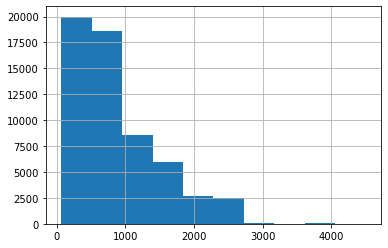

In [93]:
flights.DIST.hist() #DIST가 비행거리인데, 비행거리를 시각화하면 이런식으로 나오게됩니다. 얘네들이 어느정도 구간으로 쪼개서 볼 수 있다.

In [90]:
#구역을 정한 뒤 각 값이 어느 구역에 속하는지 표시해줌
bins = [-np.inf, 200, 500, 1000, 2000, np.inf]#그래서 bins를 만들고ㅡ inf는 무한대로 음의 무한대와 양의무한대 구역을 만들어줍니다.
cuts = pd.cut(flights.DIST, bins=bins)#그래서 컷을 확인해보면 나눠진 카테고리를 볼 수 있습니다. 그룹바이를 컷을 한다음에 
cuts

0         (500.0, 1000.0]
1        (1000.0, 2000.0]
2         (500.0, 1000.0]
3        (1000.0, 2000.0]
4        (1000.0, 2000.0]
               ...       
58487    (1000.0, 2000.0]
58488      (200.0, 500.0]
58489      (200.0, 500.0]
58490     (500.0, 1000.0]
58491     (500.0, 1000.0]
Name: DIST, Length: 58492, dtype: category
Categories (5, interval[float64]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 1000.0] < (1000.0, 2000.0] < (2000.0, inf]]

In [94]:
(
 flights
 .groupby(cuts)
 ['AIRLINE']
 .value_counts(normalize=True)#valuecounts를 하면 지금 이 value counts는 전체해석에서 비율을 보여준다. 그러니까 예를들어 전체중에서 
 .round(3)
)


DIST              AIRLINE
(-inf, 200.0]     OO         0.326
                  EV         0.289
                  MQ         0.211
                  DL         0.086
                  AA         0.052
                  UA         0.027
                  WN         0.009
(200.0, 500.0]    WN         0.194
                  DL         0.189
                  OO         0.159
                  EV         0.156
                  MQ         0.100
                  AA         0.071
                  UA         0.062
                  VX         0.028
                  US         0.016
                  NK         0.012
                  B6         0.007
                  F9         0.005
                  AS         0.001
(500.0, 1000.0]   DL         0.206
                  AA         0.144
                  WN         0.138
                  UA         0.131
                  OO         0.106
                  EV         0.101
                  MQ         0.051
                  F9         

In [92]:
# cuts 와 quantile 을 이용해 각 그룹별 분포를 볼 수도 있습니다.
(
 flights
 .groupby(cuts)
 ['AIR_TIME']
 .quantile(q=[.25, .5, .75])#각 그룹별로 4분위수를 볼 수 있다.
 .div(60)
 .round(2)
)

DIST                  
(-inf, 200.0]     0.25    0.43
                  0.50    0.50
                  0.75    0.57
(200.0, 500.0]    0.25    0.77
                  0.50    0.92
                  0.75    1.05
(500.0, 1000.0]   0.25    1.43
                  0.50    1.65
                  0.75    1.92
(1000.0, 2000.0]  0.25    2.50
                  0.50    2.93
                  0.75    3.40
(2000.0, inf]     0.25    4.30
                  0.50    4.70
                  0.75    5.03
Name: AIR_TIME, dtype: float64

groupby 활용방법 적용할 4가지의 agg, apply, filter, transform 을 알아봤습니다. 오늘 내용은 실습이 많아서 좀더 걸렸을 거지만 ! 이번주 다음주 다다음주는 비슷한 분량으로 나갈 것 같습니다. 책의 중요한 내용을 다루다보니, 뒤에 시계열까지는 나가고자합니다